In [1]:
import loveslide
import pandas as pd
#### Might need to load gcc and R depending on your cluster true even for installing
import rpy2.robjects.packages as rpackages

#### pheatmap, linprog, knockoff
utils = rpackages.importr('utils')
# take 10ish mins to install
utils.install_packages(rpackages.StrVector(['pheatmap', 'linprog', 'knockoff']))

/ocean/projects/cis240075p/skeshari/.conda/envs/loveslide_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
x = pd.read_csv('./HIV+cytokines_X.csv', index_col=0)
y = pd.read_csv('./HIV+cytokines_y.csv', index_col=0)
input_params = {
    'x_path' : None,
    'y_path' : None,
    'fdr' : 0.1,
    'thresh_fdr': 0.1,
    'spec' : 0.15,
    'y_factor': True,
    'niter' : 500,
    'SLIDE_top_feats': 20,
    'pure_homo' : True,
    'delta' : [0.01, 0.1],
    'lambda' : [0.1, 0.5],
    'out_path': '.'
}

In [3]:
from loveslide import OptimizeSLIDE
slider = OptimizeSLIDE(input_params, x=x, y=y)


### PARAMETERS ###

x_path: None
y_path: None
fdr: 0.1
thresh_fdr: 0.1
spec: 0.15
y_factor: True
niter: 500
SLIDE_top_feats: 20
pure_homo: True
delta: [0.01, 0.1]
lambda: [0.1, 0.5]
out_path: .
n_workers: 1
do_interacts: True

###### DATA ######

60 samples
80 features
61.7% cases
38.3% controls

##################

Running LOVE with delta=0.01 and lambda=0.1
LOVE found 19 latent factors.

Running SLIDE knockoffs...
Calculated f_size: 19
Finding standalone LF...


Processing subsets: 100%|██████████| 1/1 [01:37<00:00, 97.75s/it]


Found 6 standalone LF
Finding interacting LF...


Processing subsets: 100%|██████████| 5/5 [05:14<00:00, 62.89s/it]


Found 2 interacting LF

SLIDE complete.
All same class
All same class
All same class
All same class
All same class
All same class
All same class
All same class
All same class
All same class
All same class
All same class
All same class
All same class
All same class


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: from glmnet C++ code (error code -410); Convergence for 410th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned 

R[write to console]: 2: from glmnet C++ code (error code -449); Convergence for 449th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned 

R[write to console]: 3: from glmnet C++ code (error code -477); Convergence for 477th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned 

R[write to console]: 4: from glmnet C++ code (error code -434); Convergence for 434th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned 

R[write to console]: 5: from glmnet C++ code (error code -487); Convergence for 487th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned 

R[write to cons


Completed 0.01_0.1

##################

Running LOVE with delta=0.01 and lambda=0.5
LOVE found 19 latent factors.

Running SLIDE knockoffs...
Calculated f_size: 19
Finding standalone LF...


Processing subsets: 100%|██████████| 1/1 [00:39<00:00, 39.63s/it]


Found 6 standalone LF
Finding interacting LF...


Processing subsets: 100%|██████████| 5/5 [02:18<00:00, 27.72s/it]


Found 2 interacting LF

SLIDE complete.
All same class
All same class
All same class
All same class
All same class
All same class
All same class
All same class
All same class
All same class
All same class
All same class
All same class
All same class
All same class


/ix3/djishnu/alw399/SLIDE_py/src/loveslide/plotting.py:100: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(8, 8), facecolor='white')



Completed 0.01_0.5

##################

Running LOVE with delta=0.1 and lambda=0.1
LOVE found 16 latent factors.

Running SLIDE knockoffs...
Calculated f_size: 16
Finding standalone LF...


Processing subsets: 100%|██████████| 1/1 [00:26<00:00, 26.78s/it]


No standalone LF found

SLIDE complete.

Completed 0.1_0.1

##################

Running LOVE with delta=0.1 and lambda=0.5
LOVE found 16 latent factors.

Running SLIDE knockoffs...
Calculated f_size: 16
Finding standalone LF...


Processing subsets: 100%|██████████| 1/1 [00:21<00:00, 21.58s/it]


Found 1 standalone LF
Finding interacting LF...


Processing subsets: 100%|██████████| 1/1 [00:23<00:00, 23.69s/it]


Found 2 interacting LF

SLIDE complete.


/ix3/djishnu/alw399/SLIDE_py/src/loveslide/plotting.py:74: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


All same class
All same class
All same class
All same class
All same class
All same class
All same class
All same class
All same class
All same class
All same class
All same class
All same class
All same class
All same class

Completed 0.1_0.5

##################

CPU times: user 8min 45s, sys: 17.9 s, total: 9min 3s
Wall time: 15min 20s


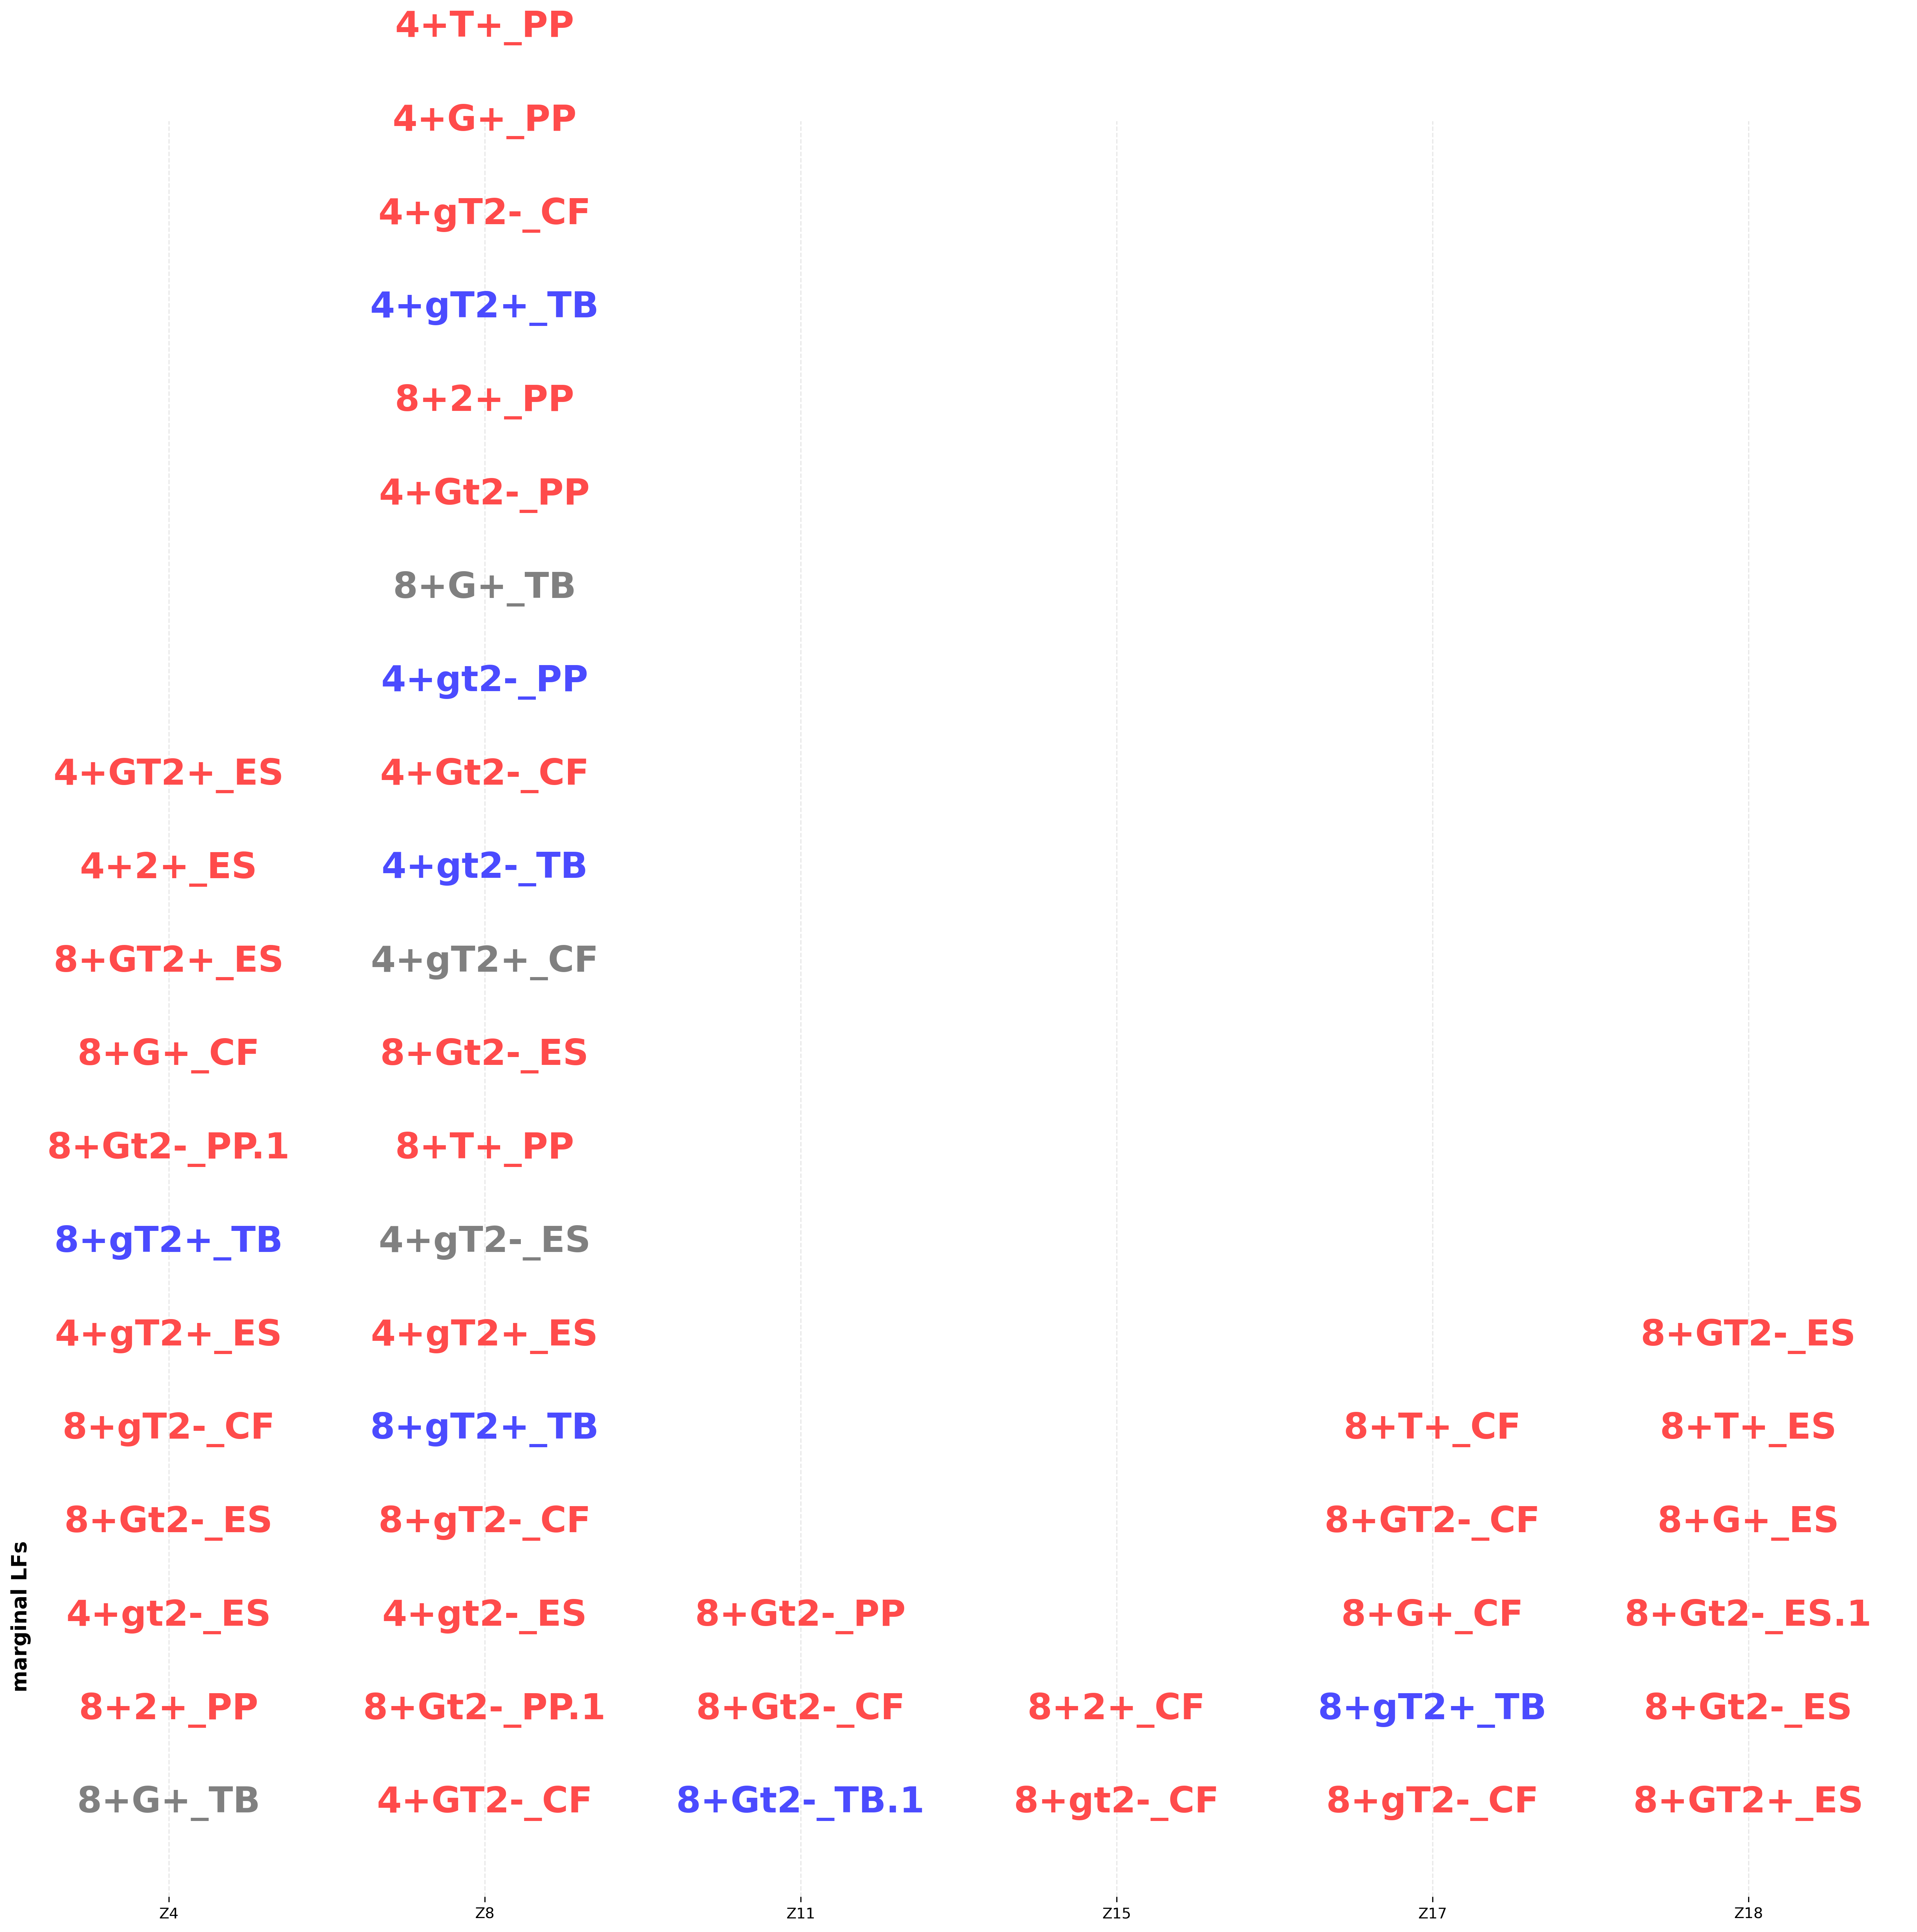

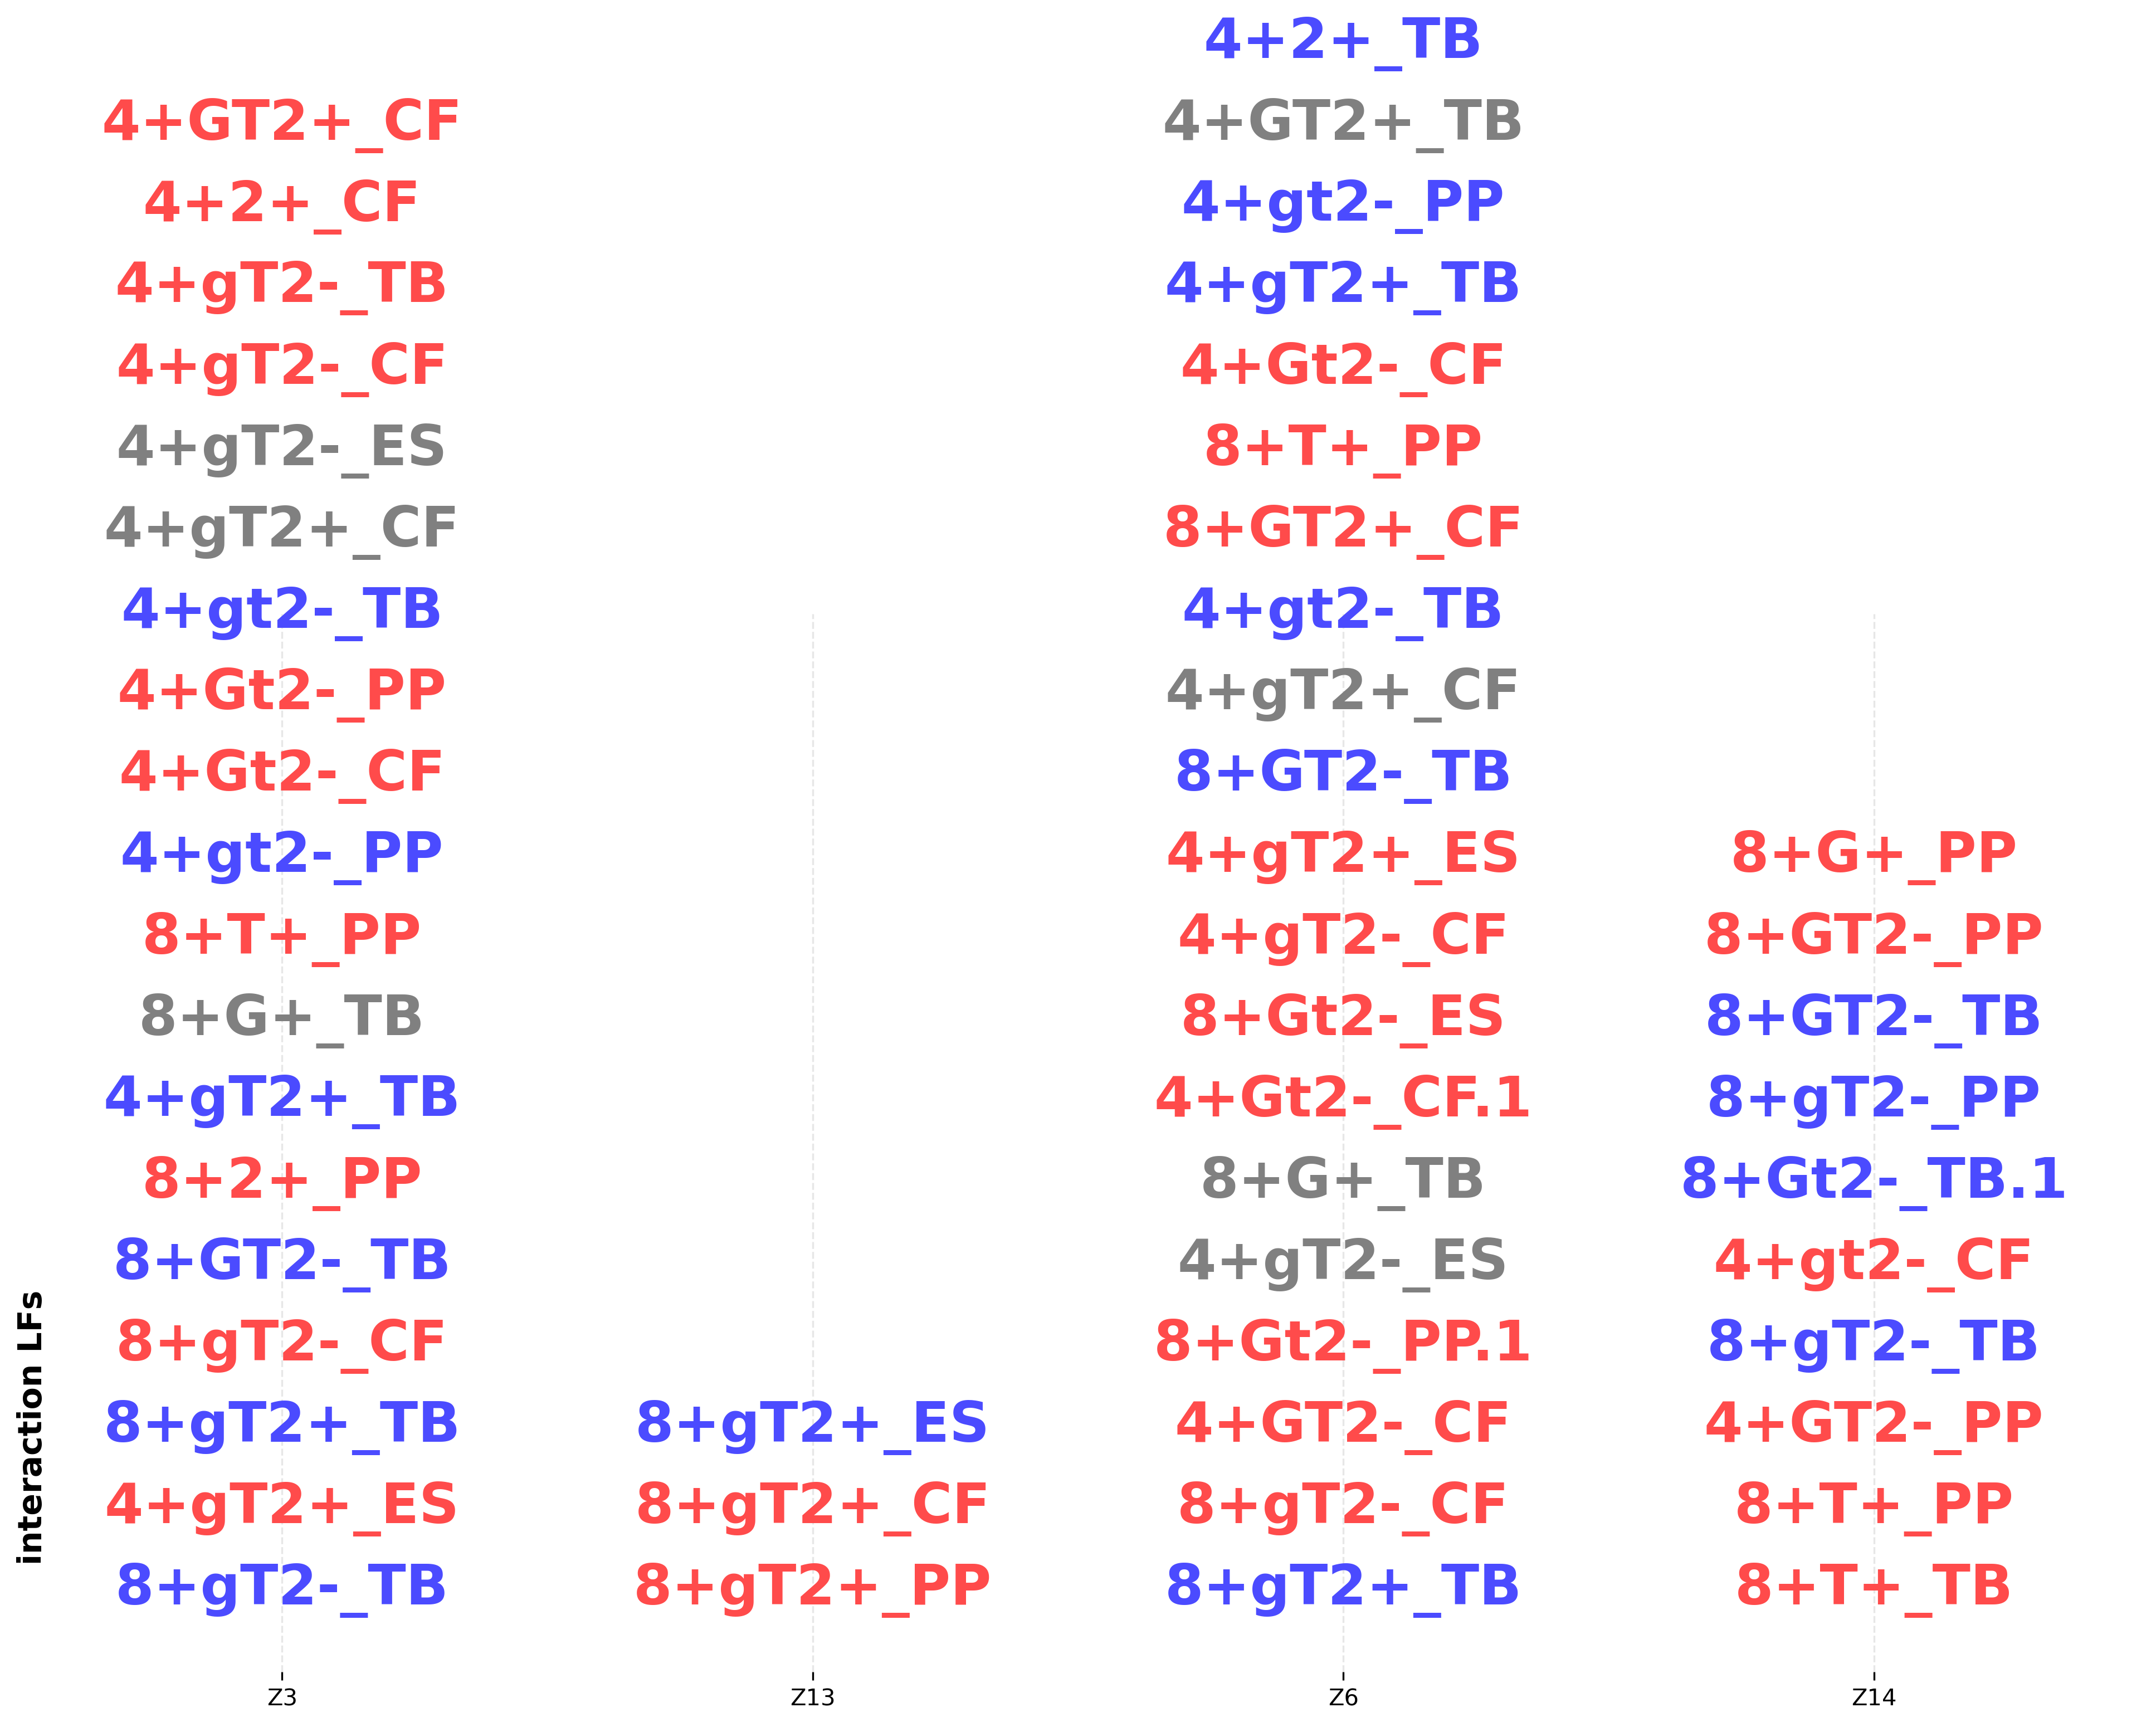

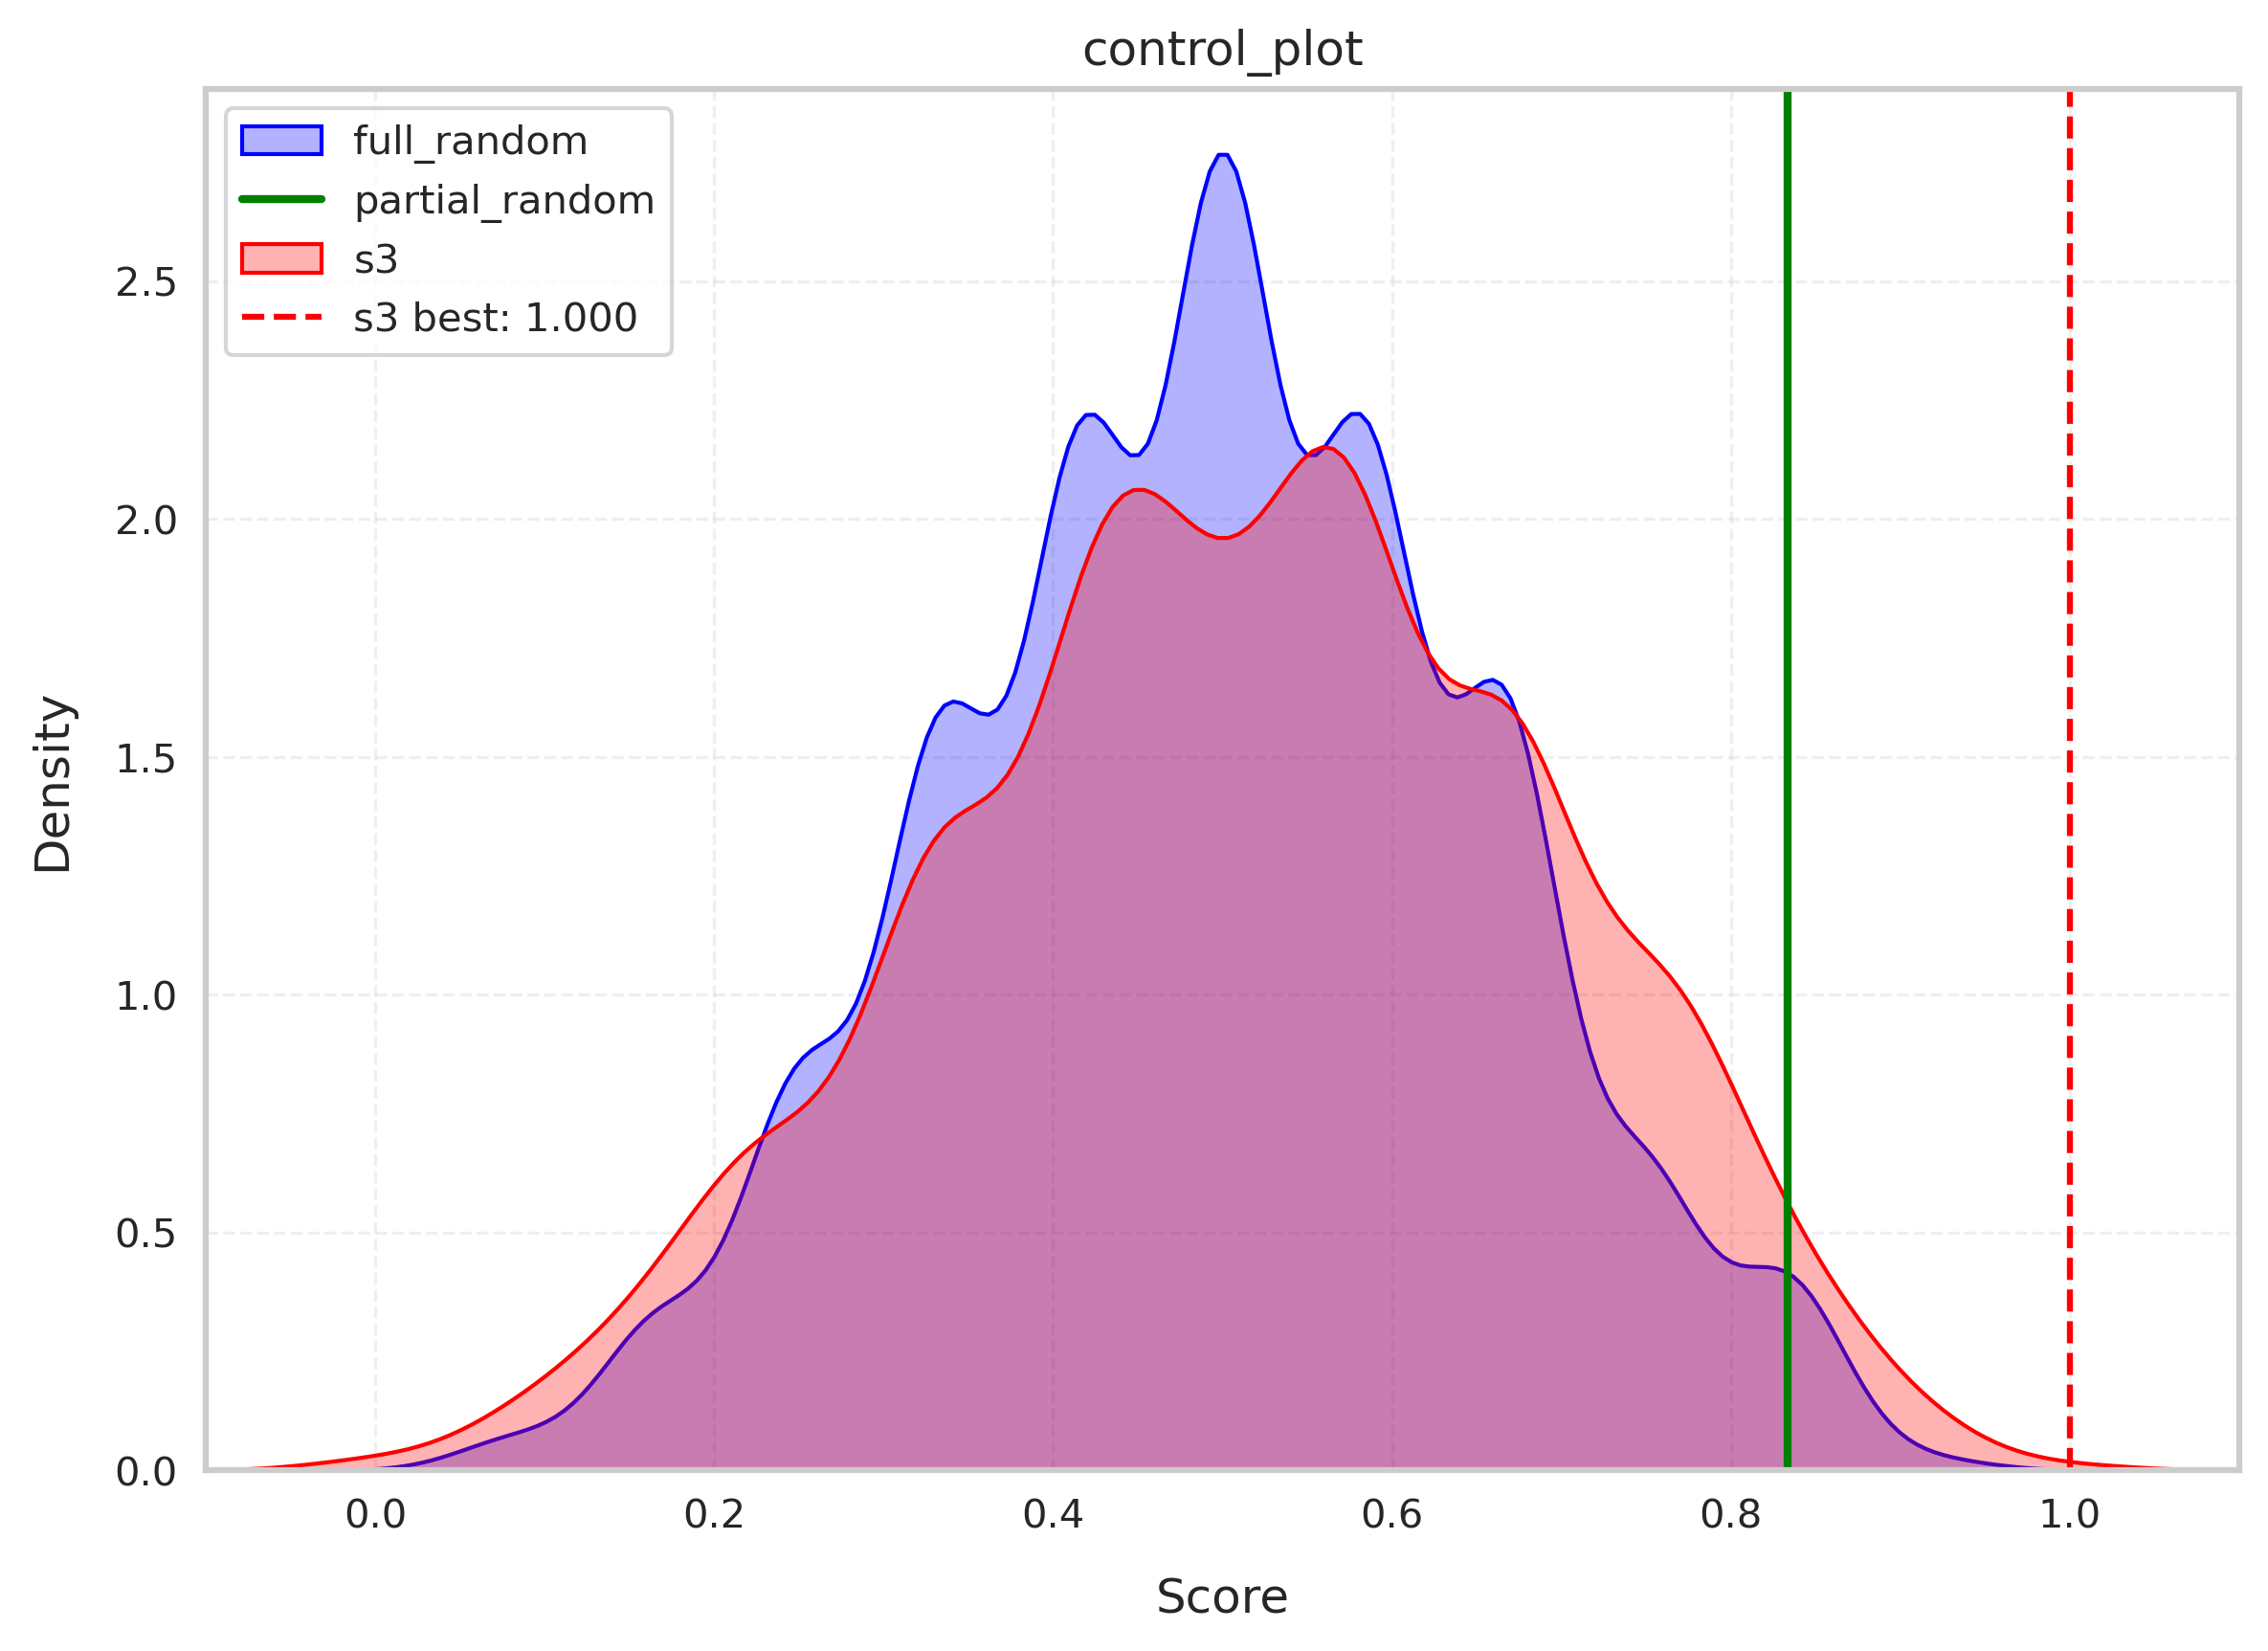

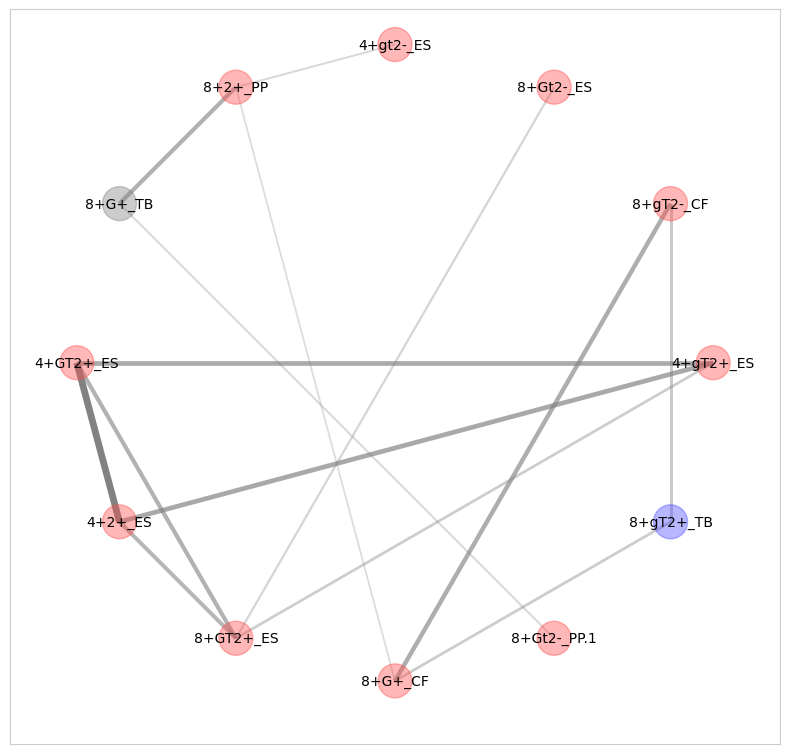

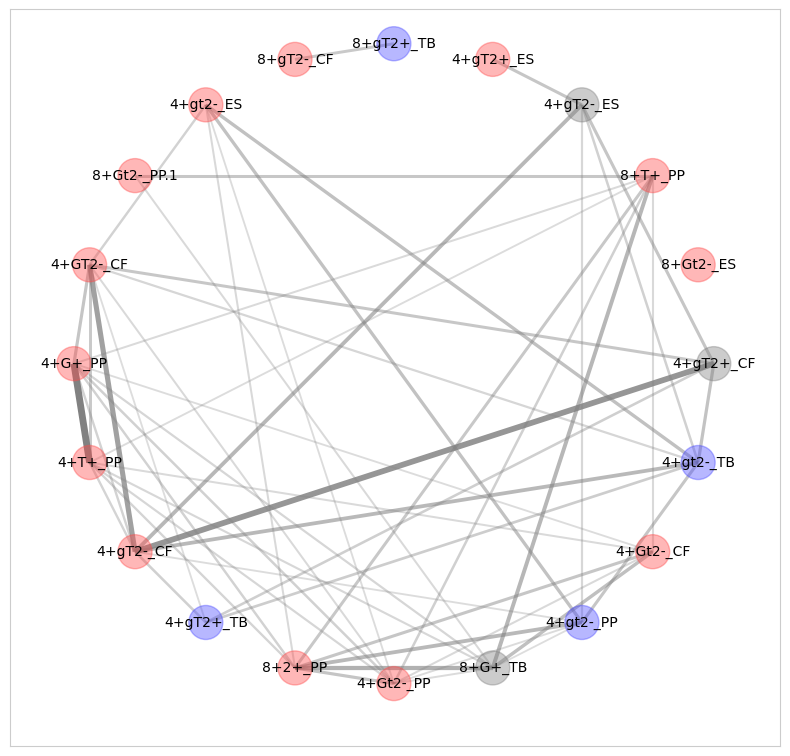

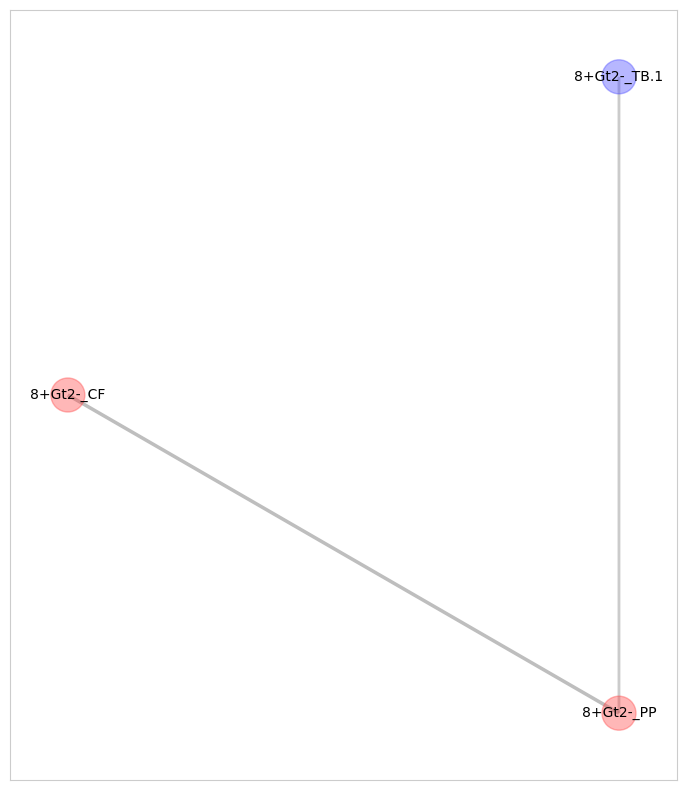

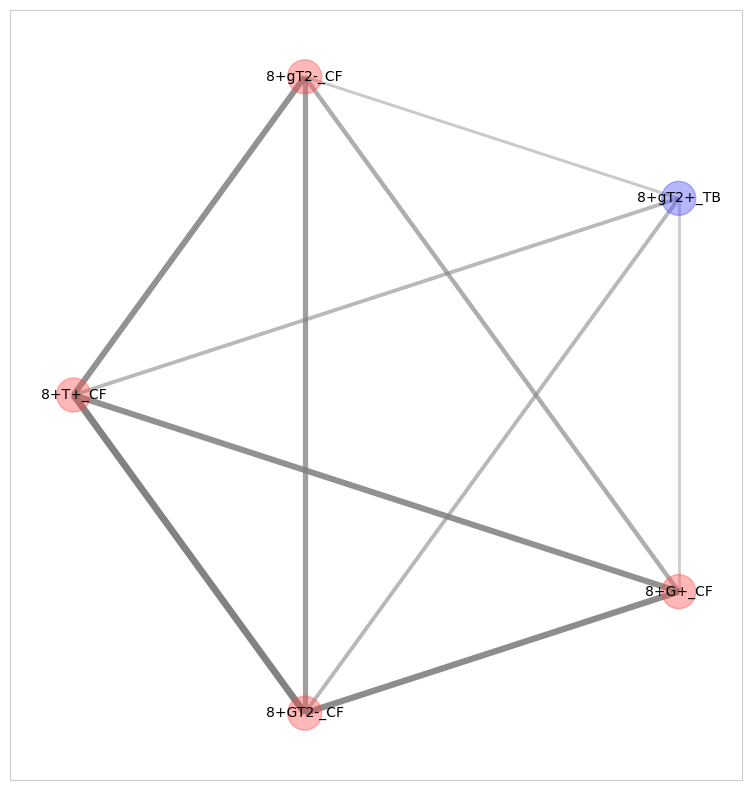

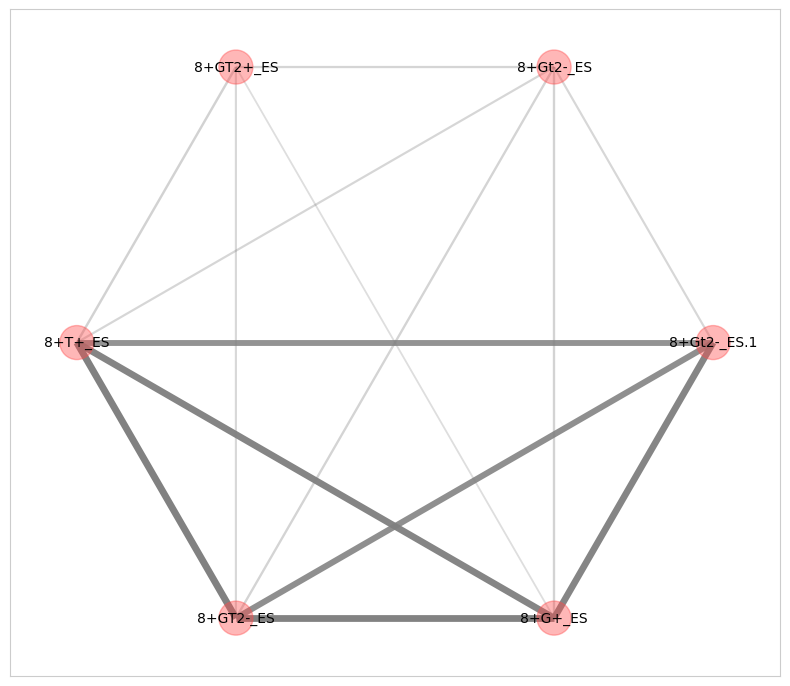

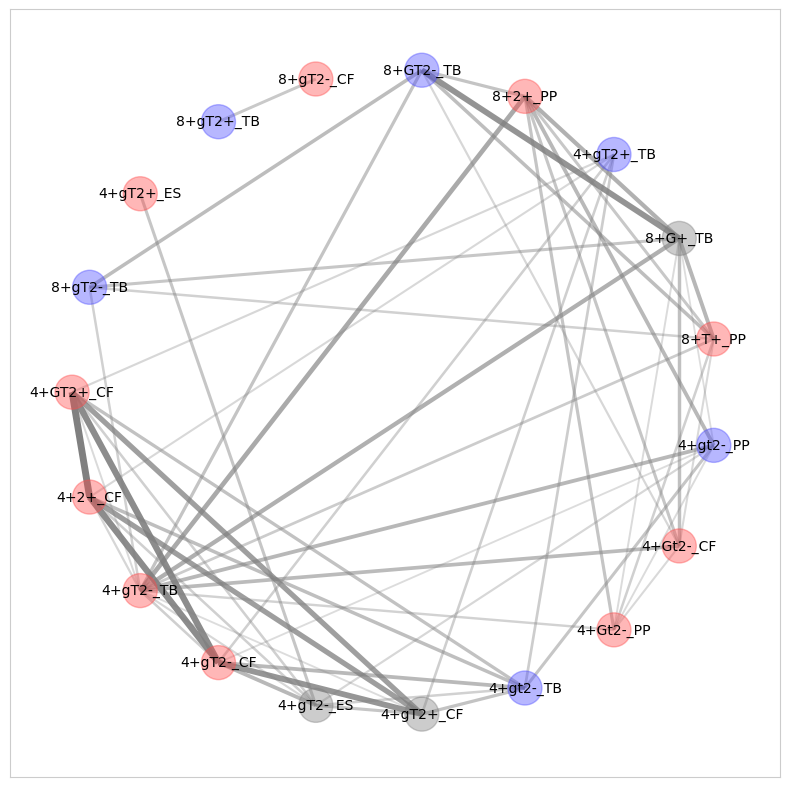

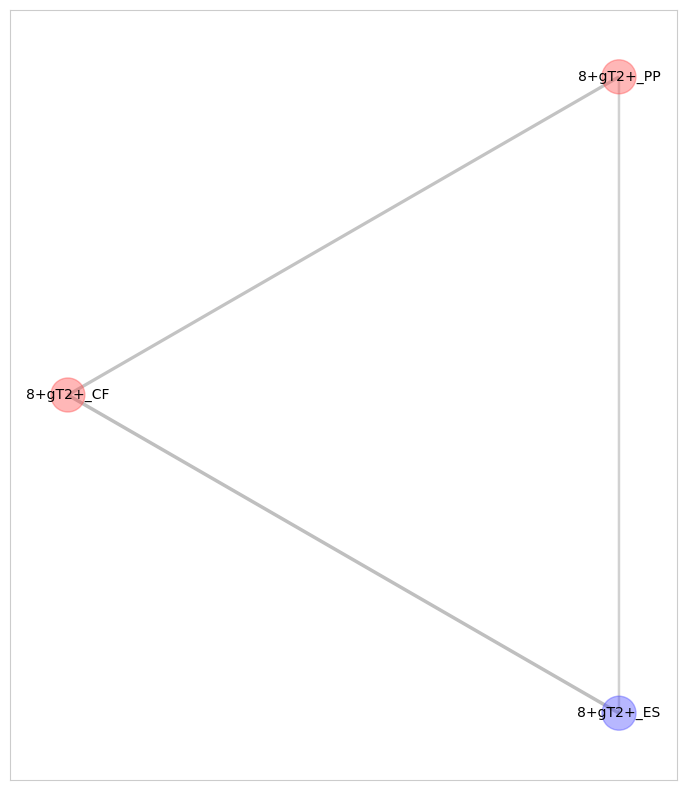

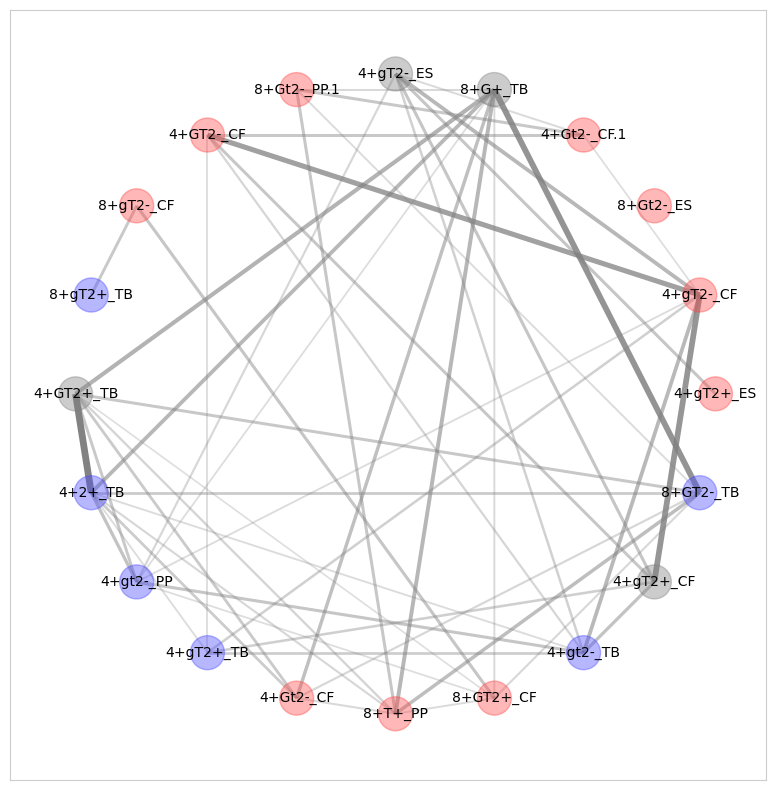

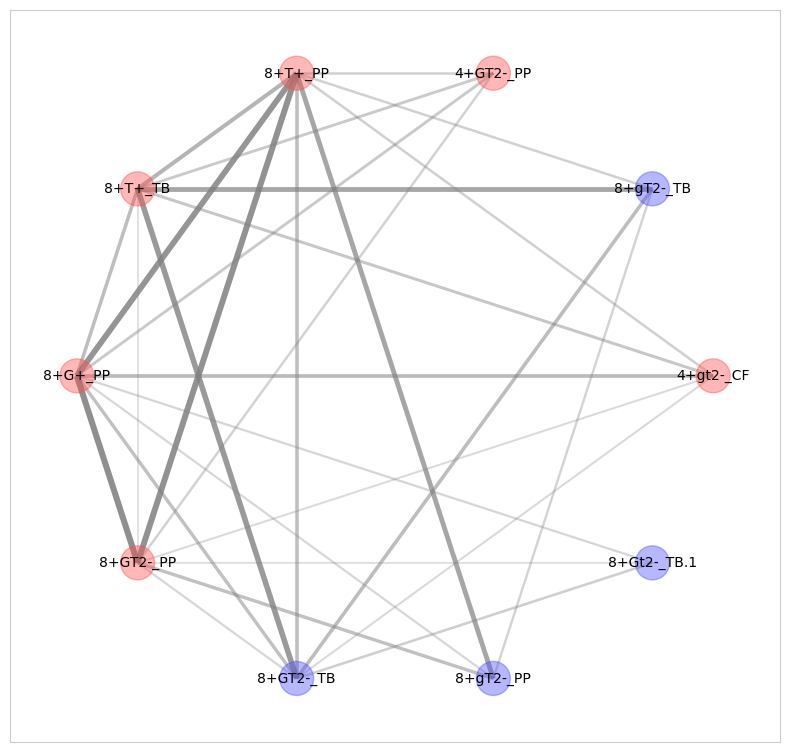

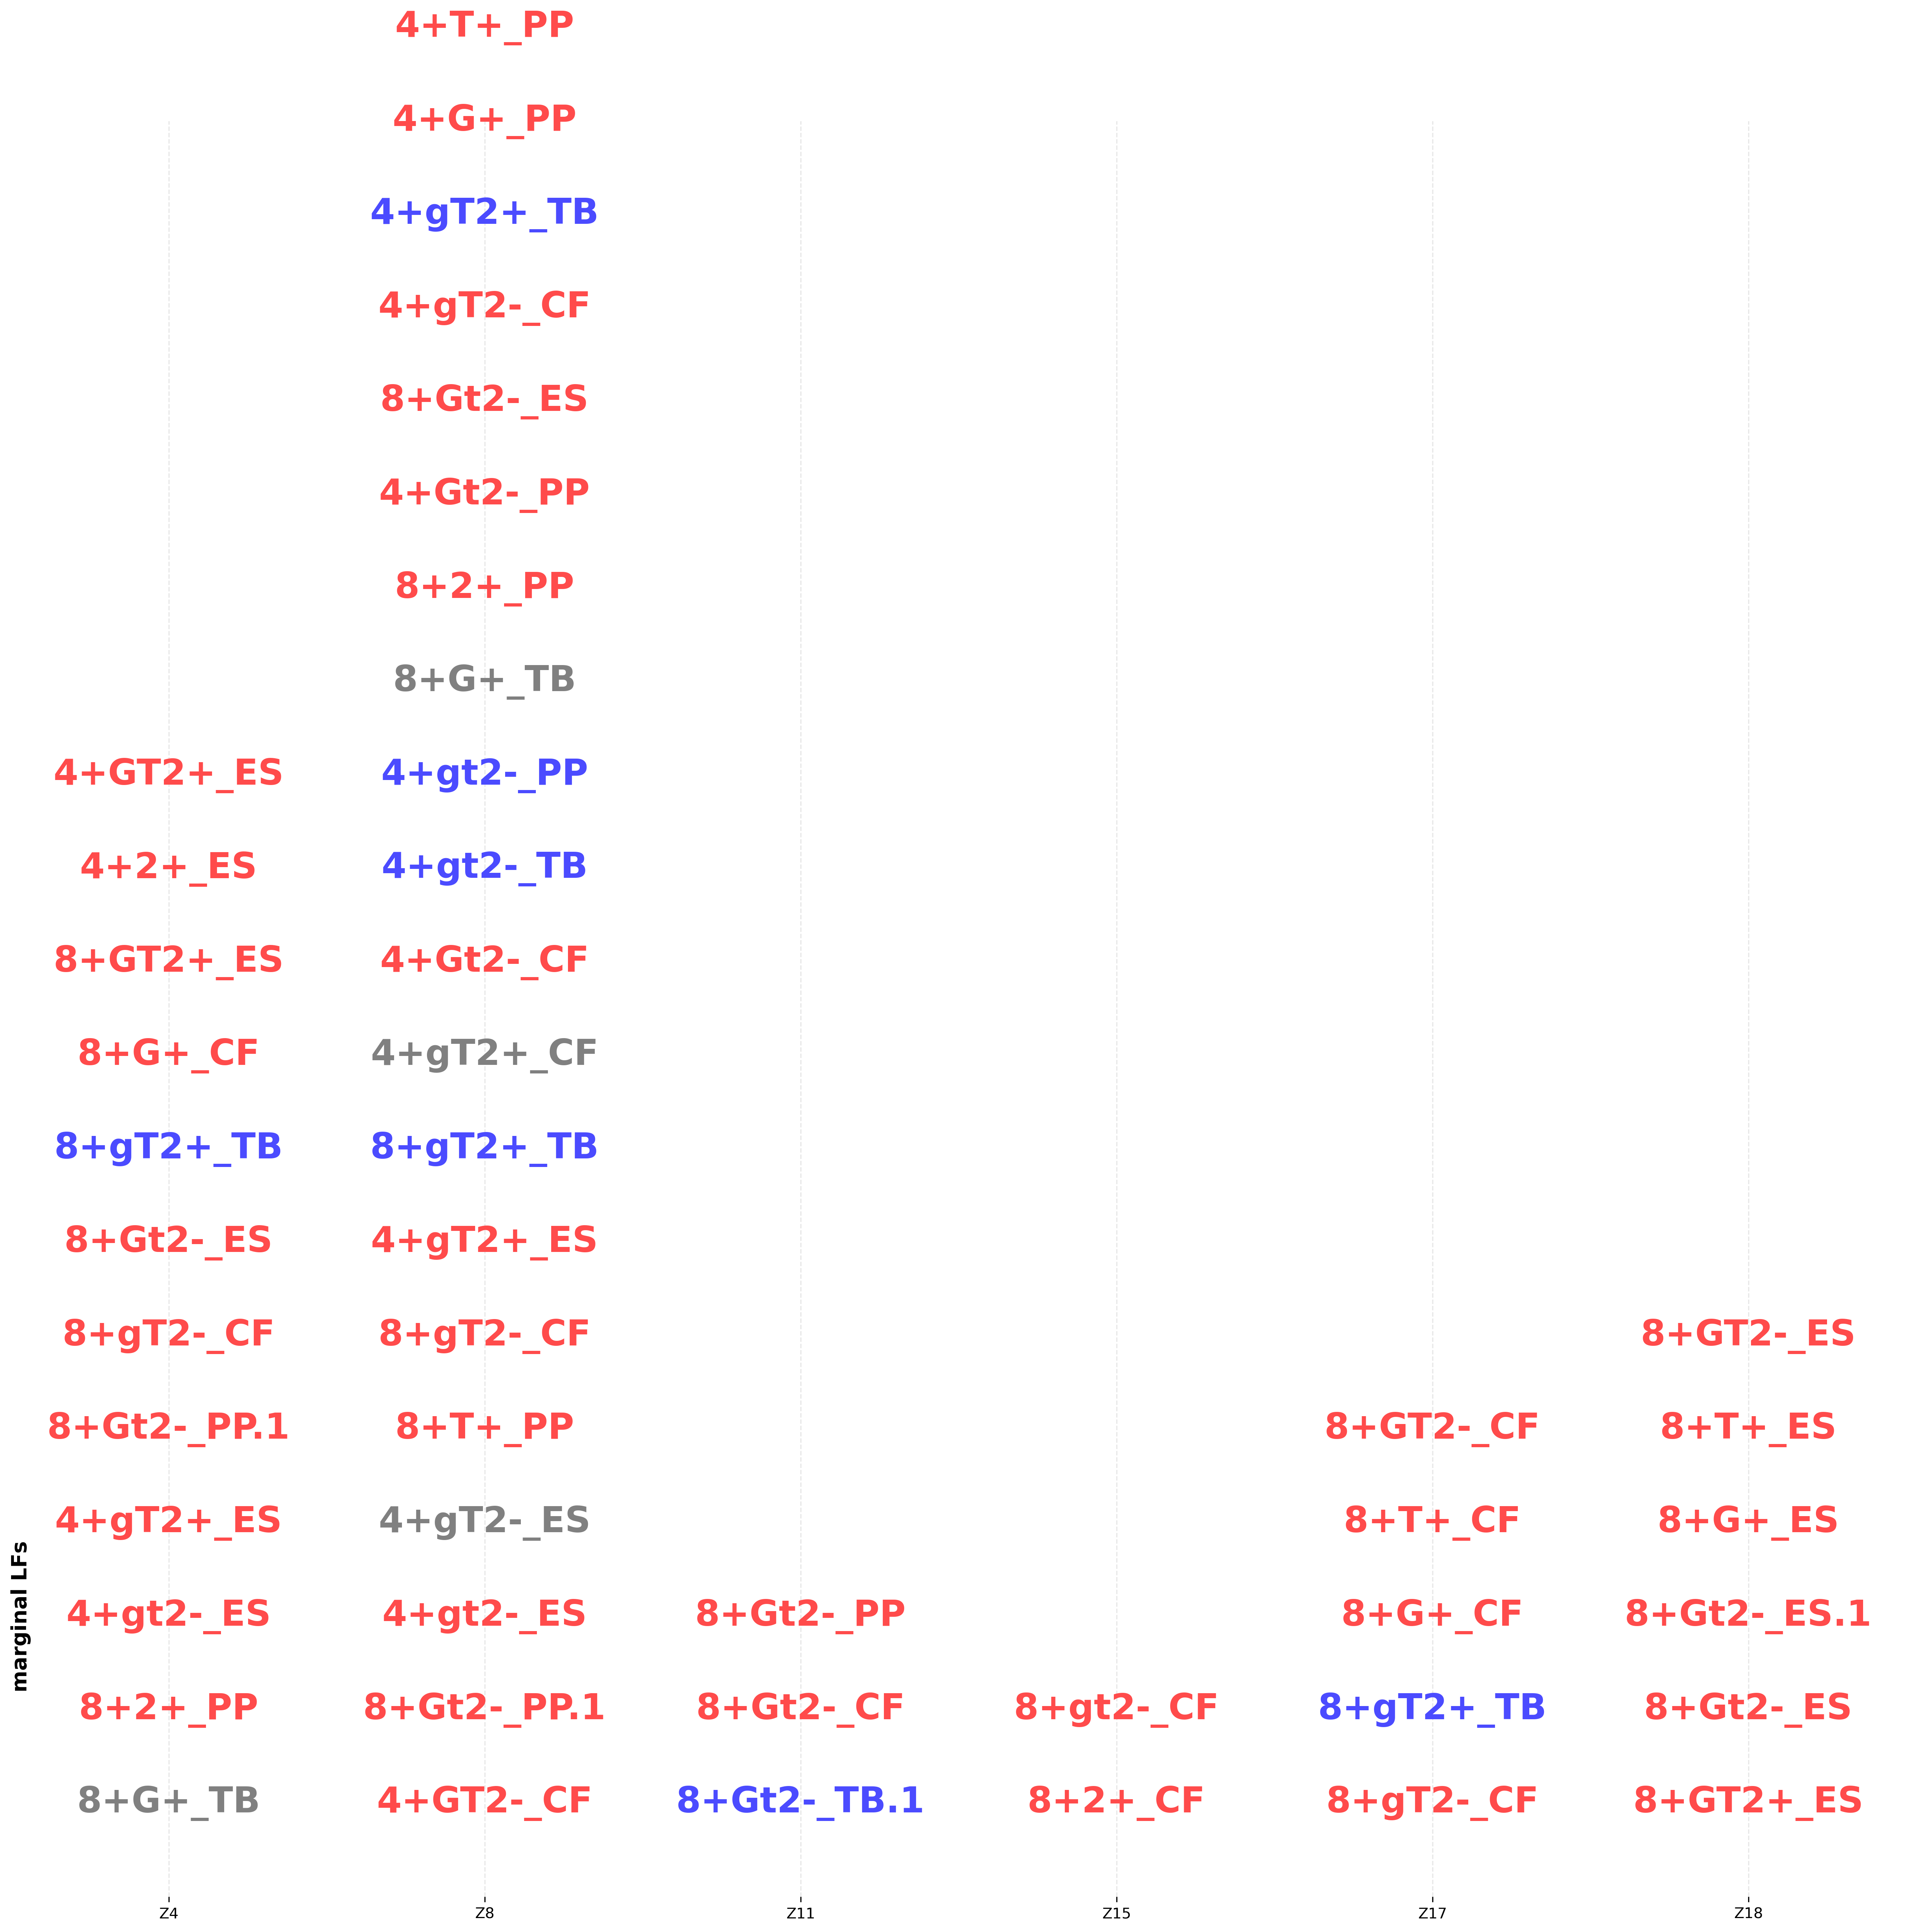

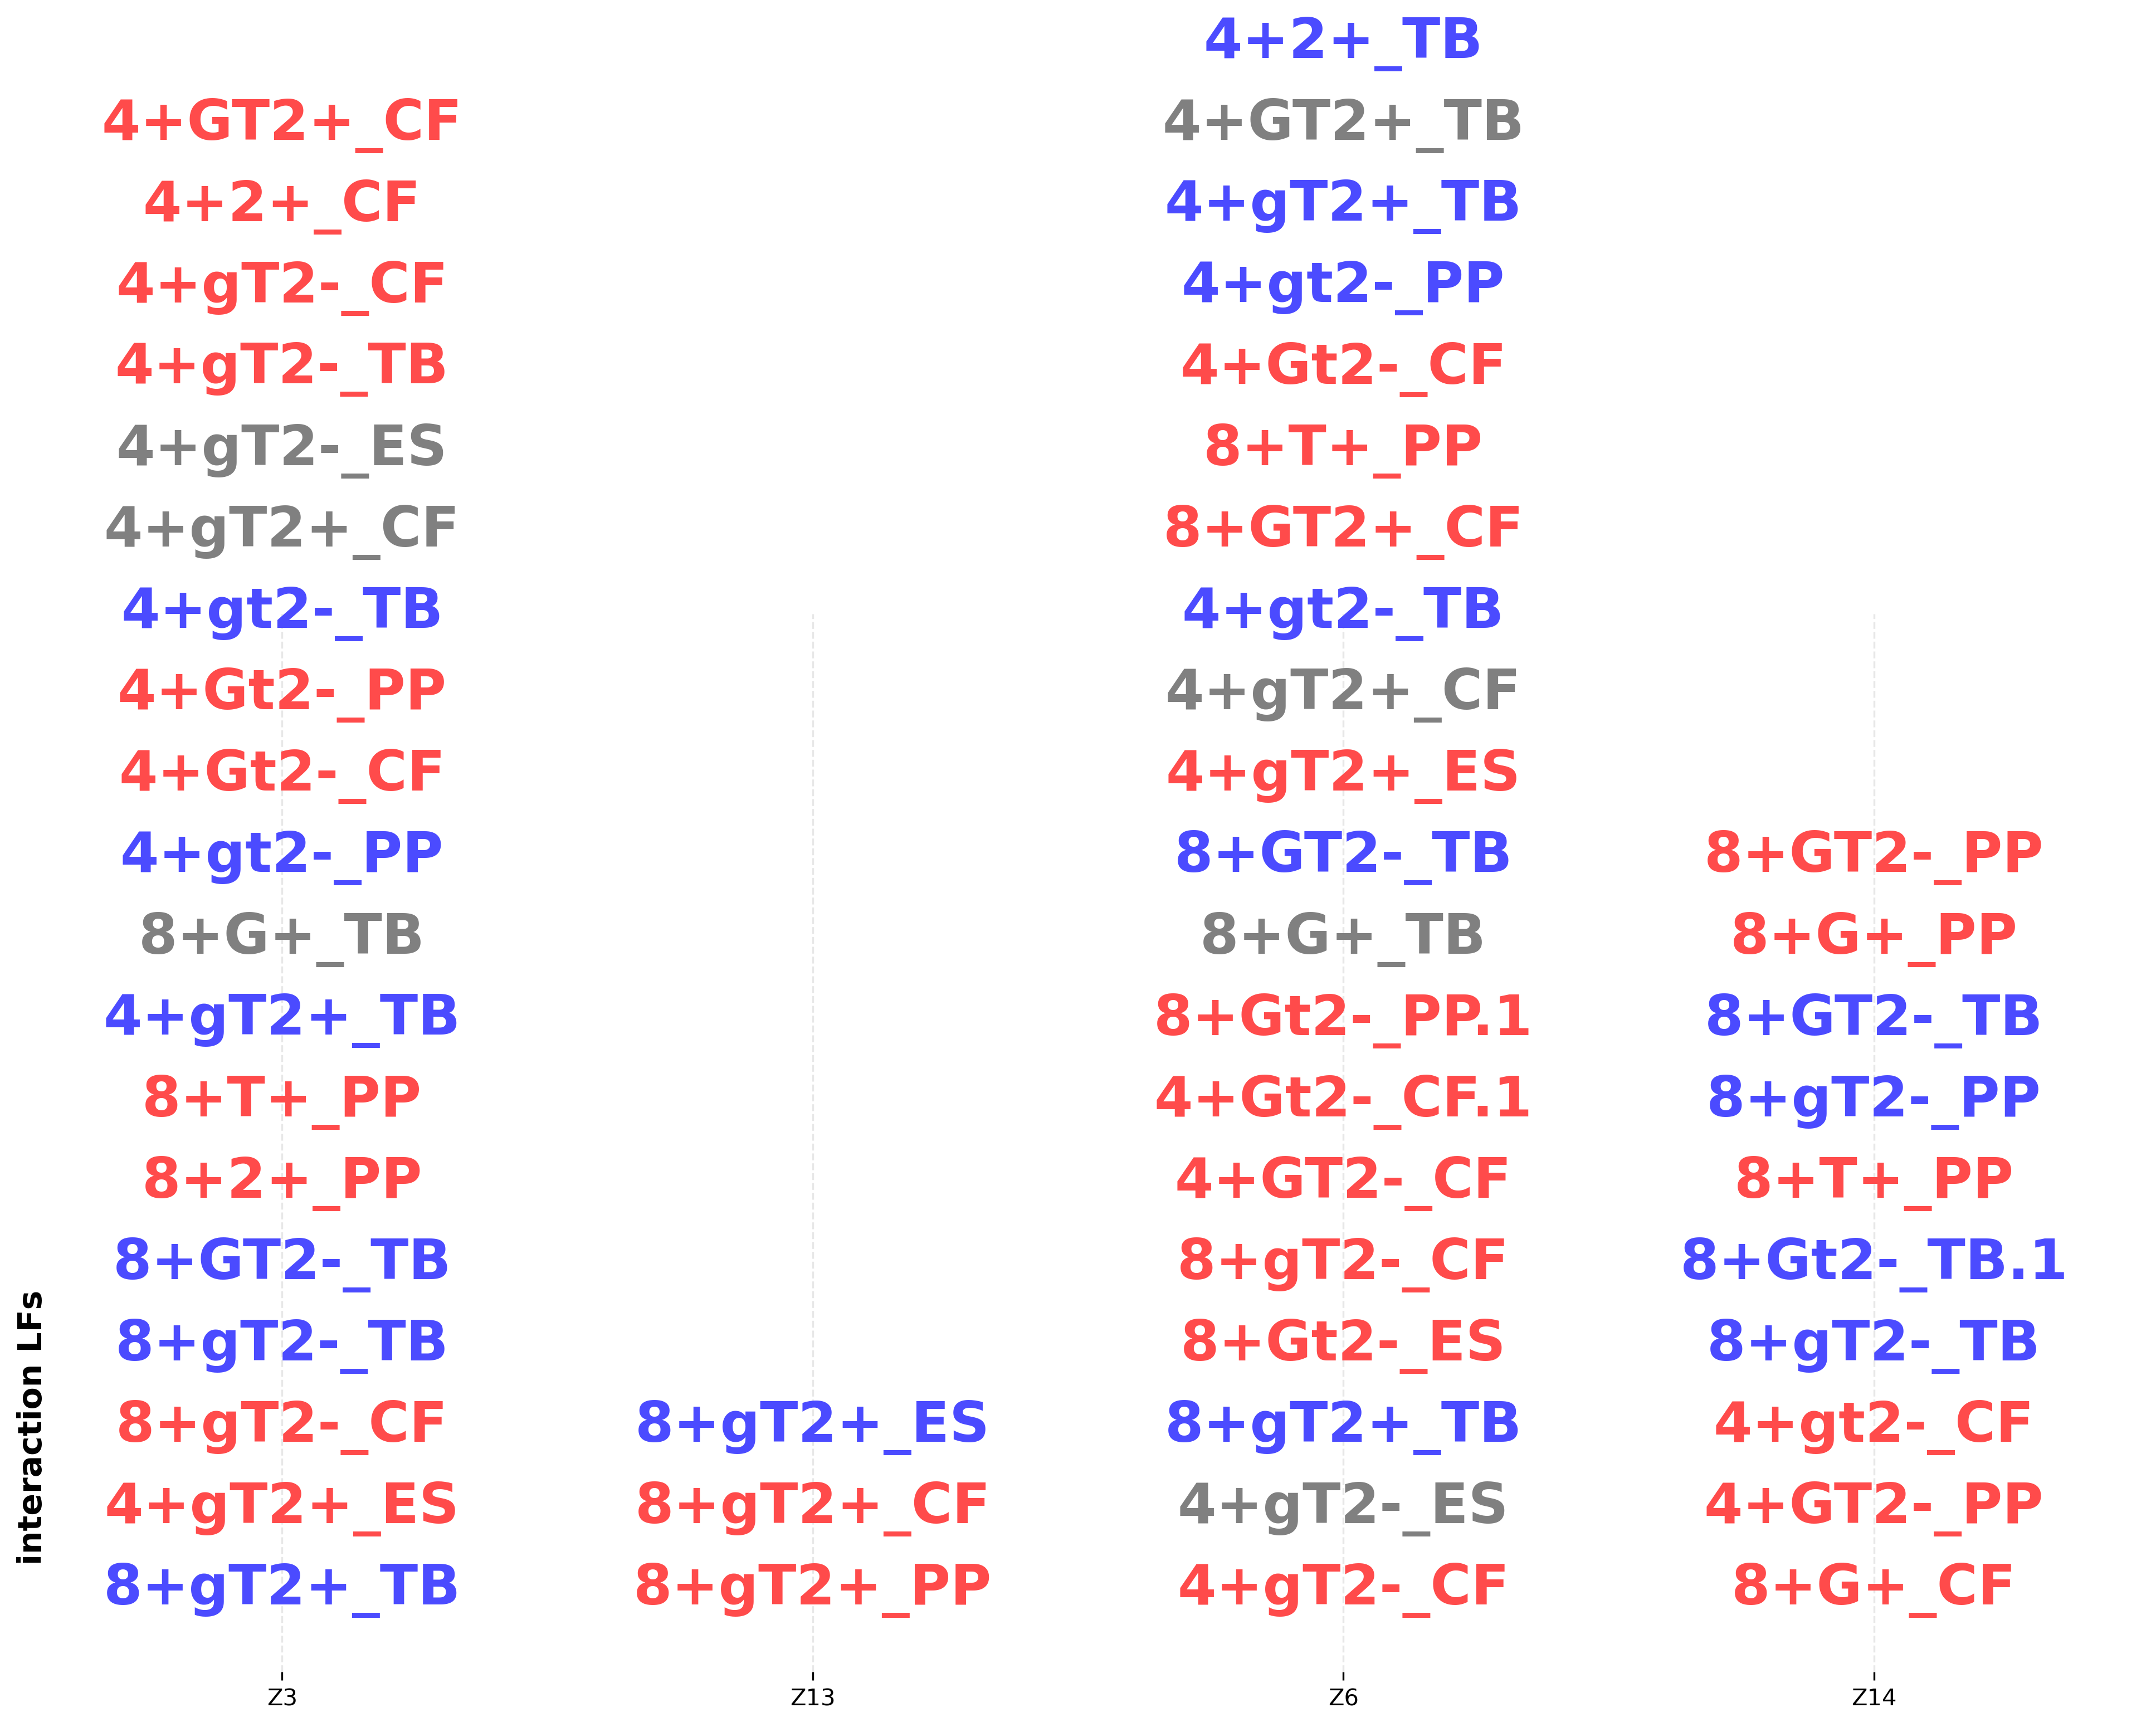

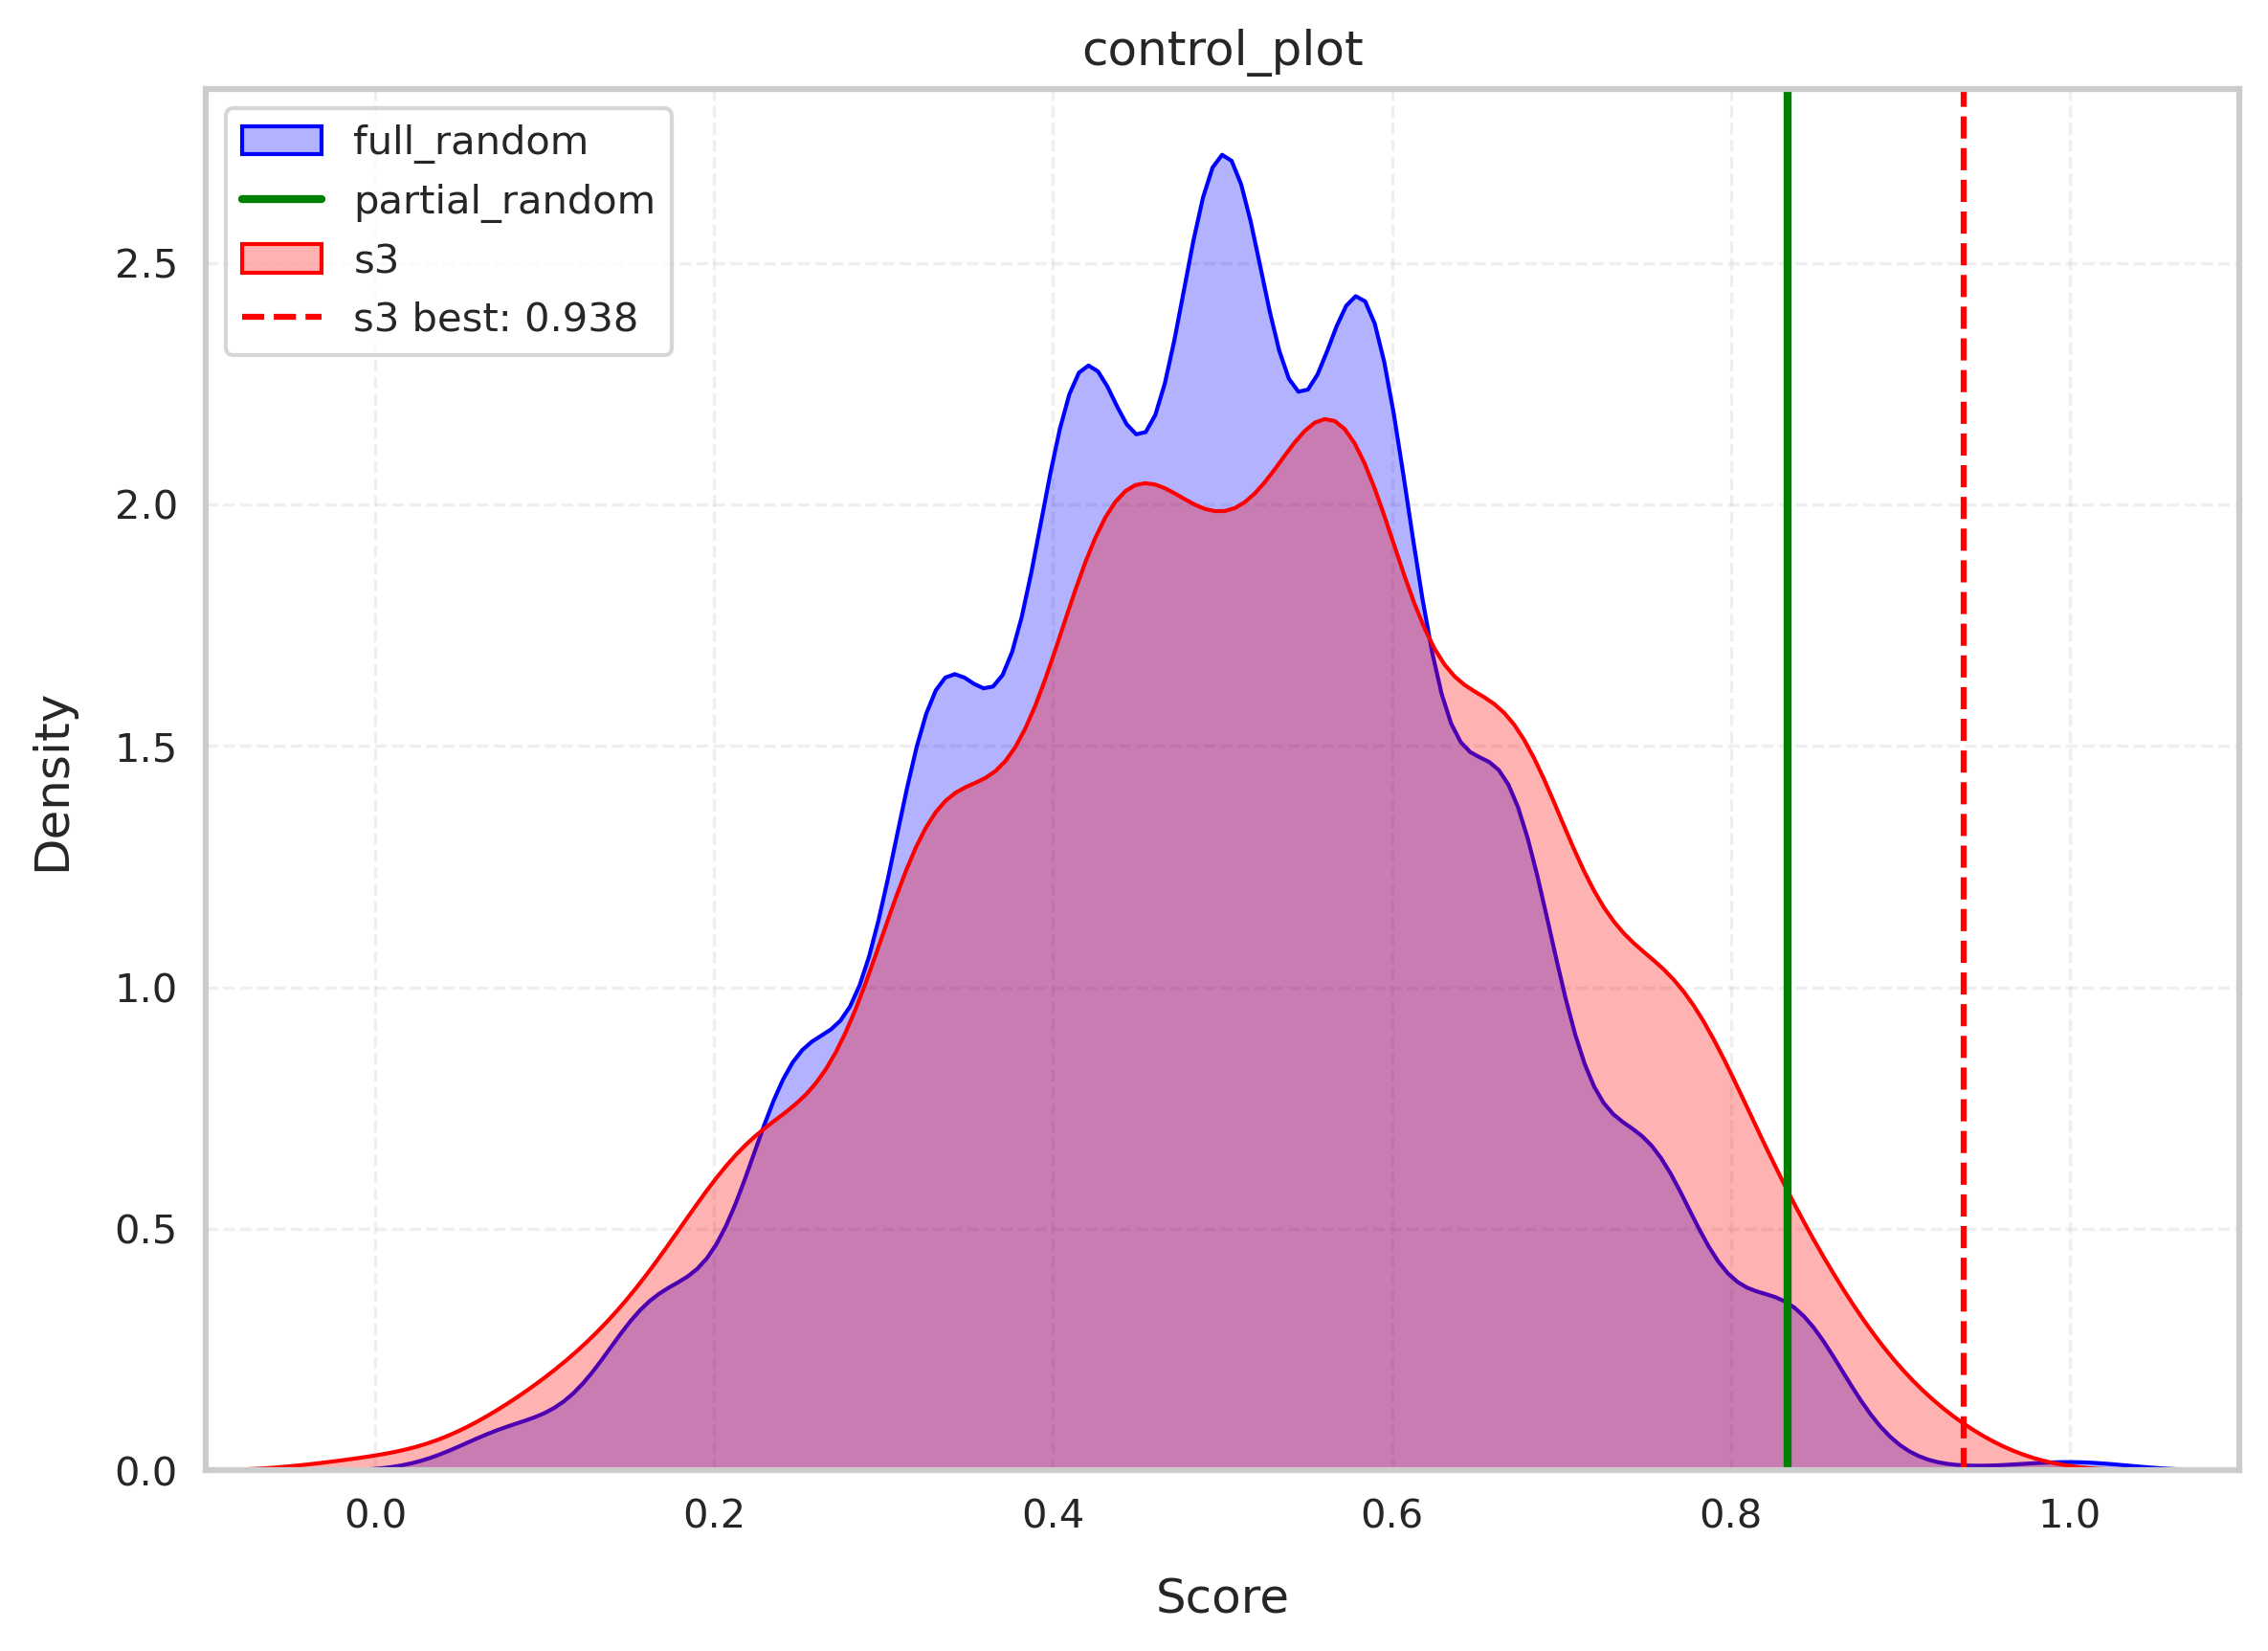

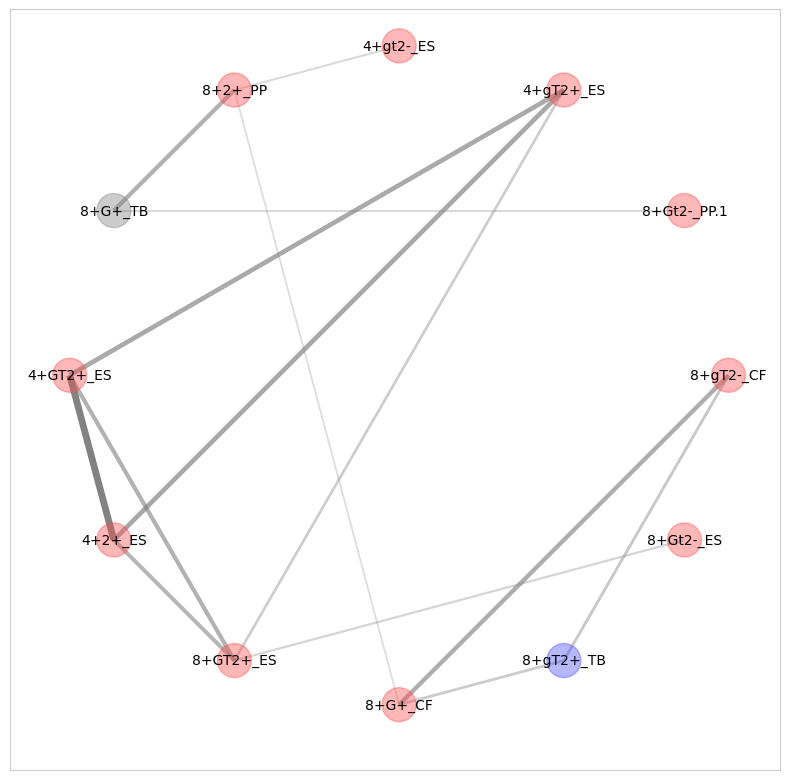

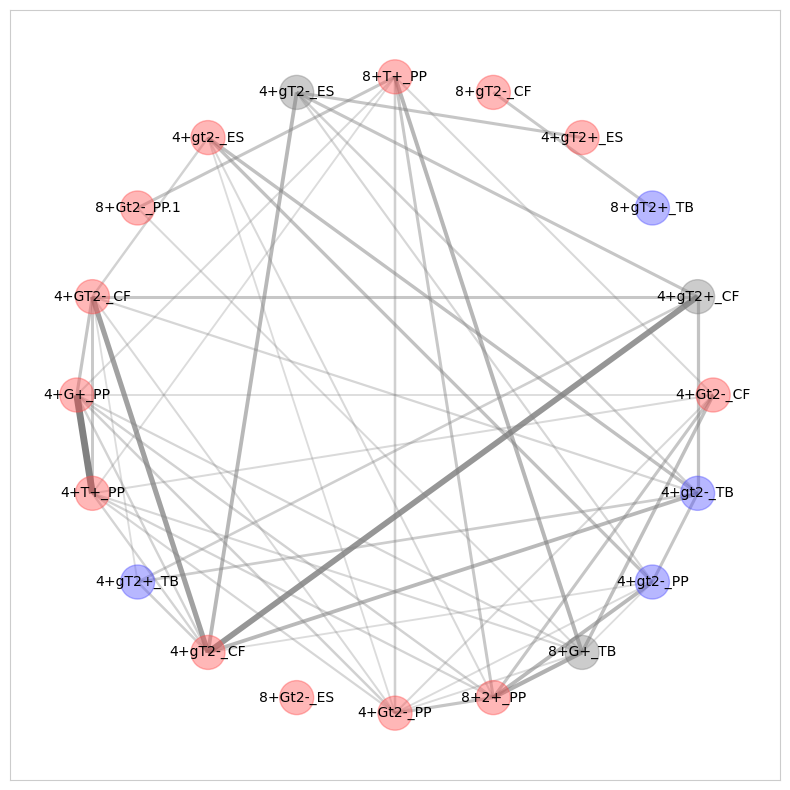

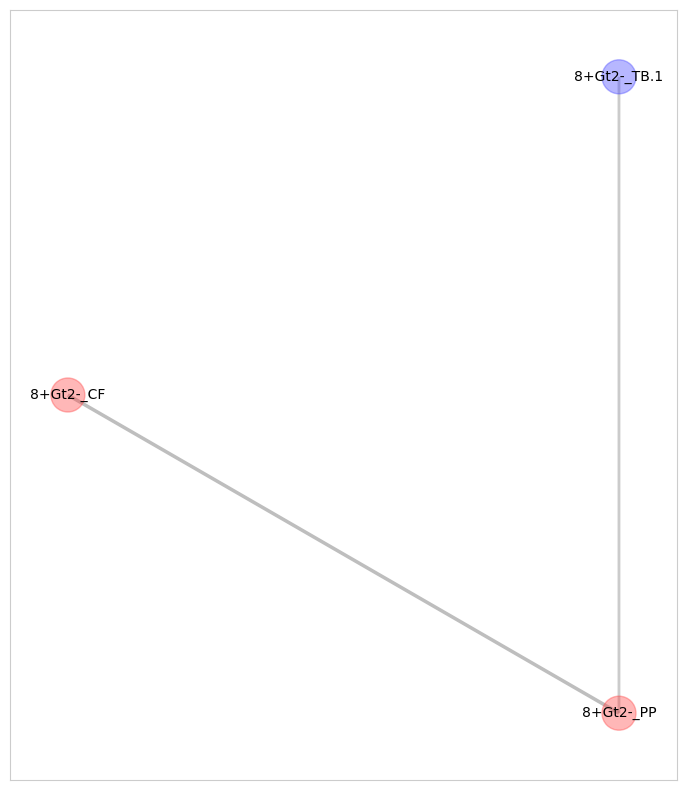

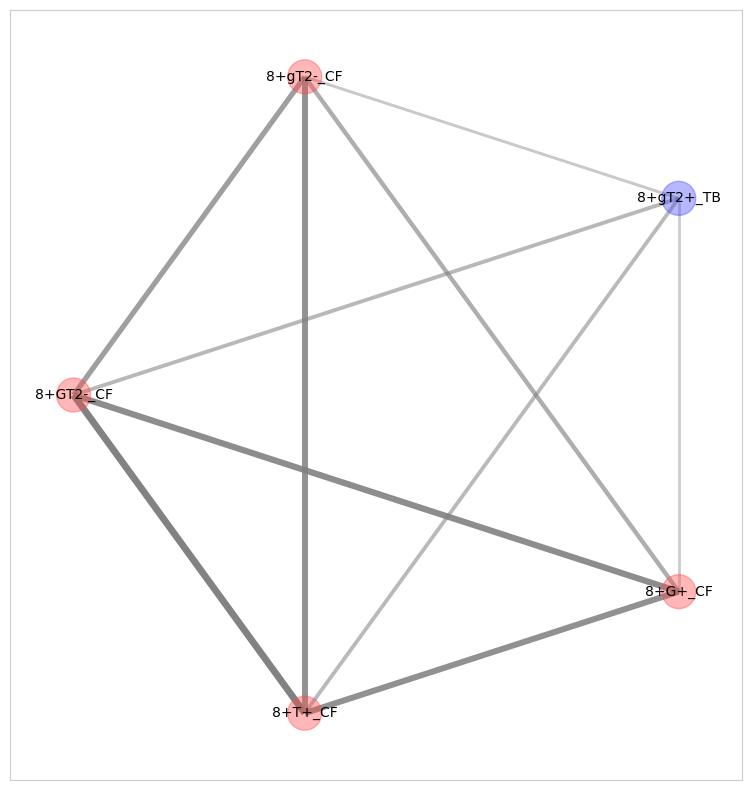

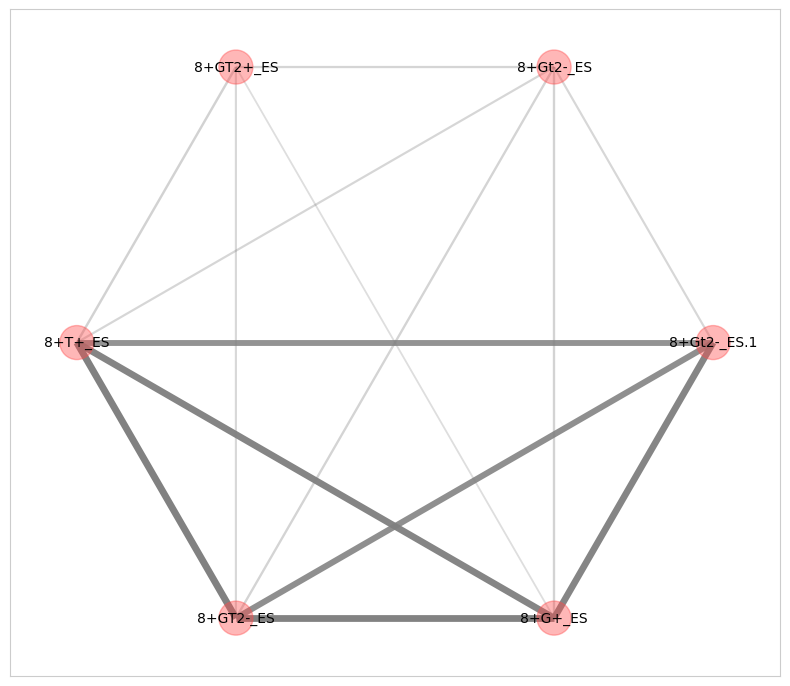

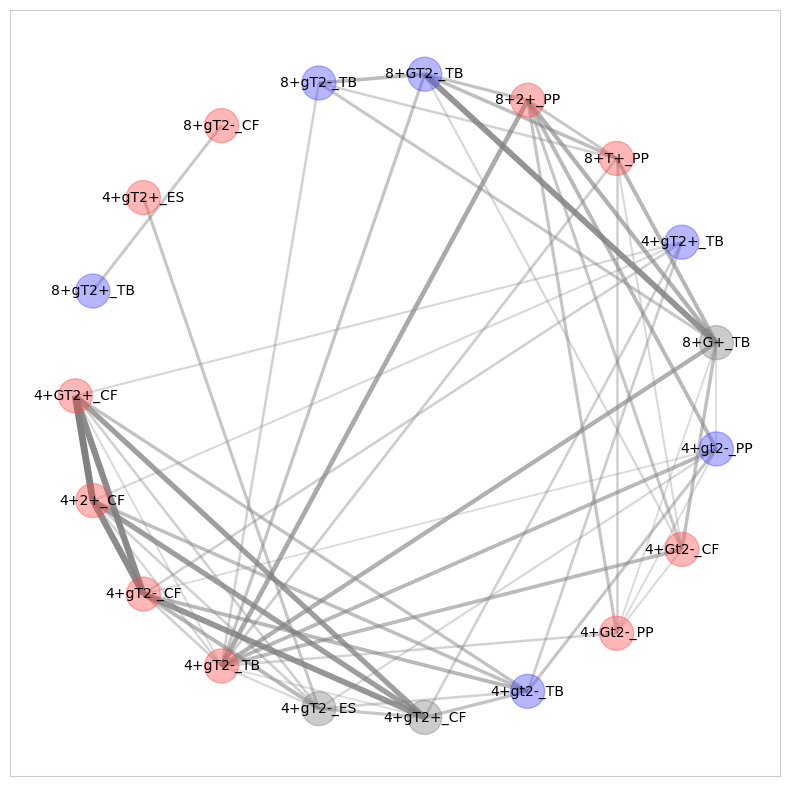

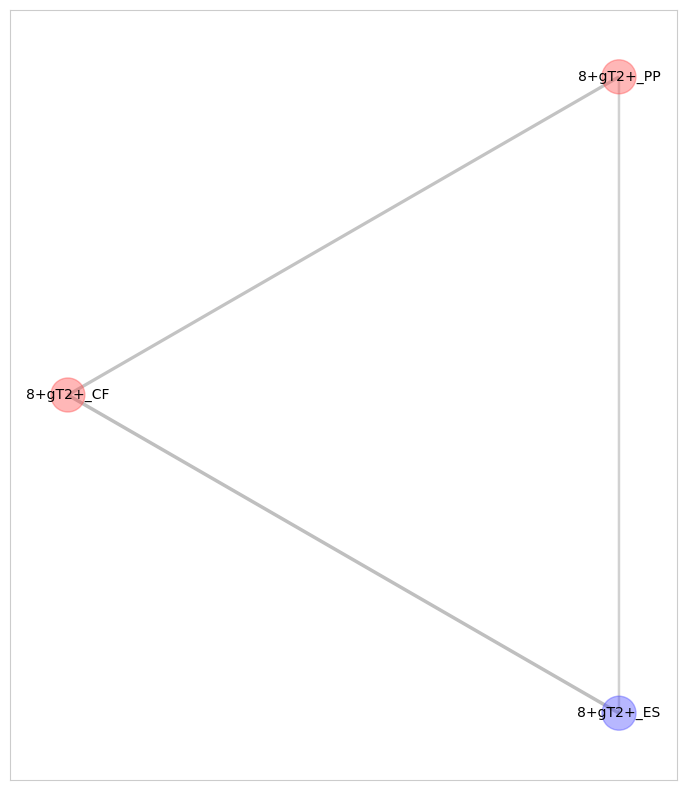

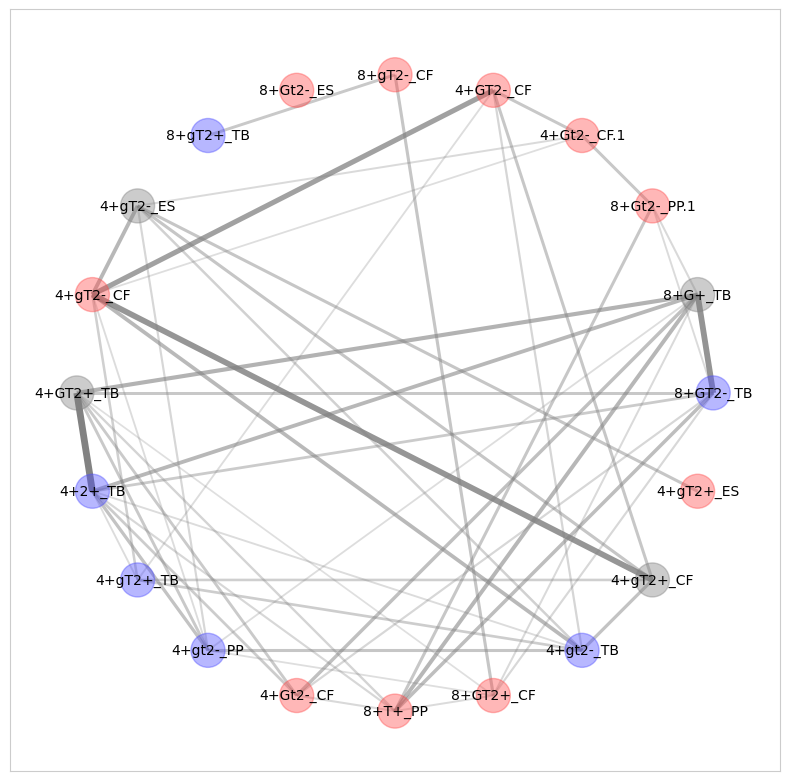

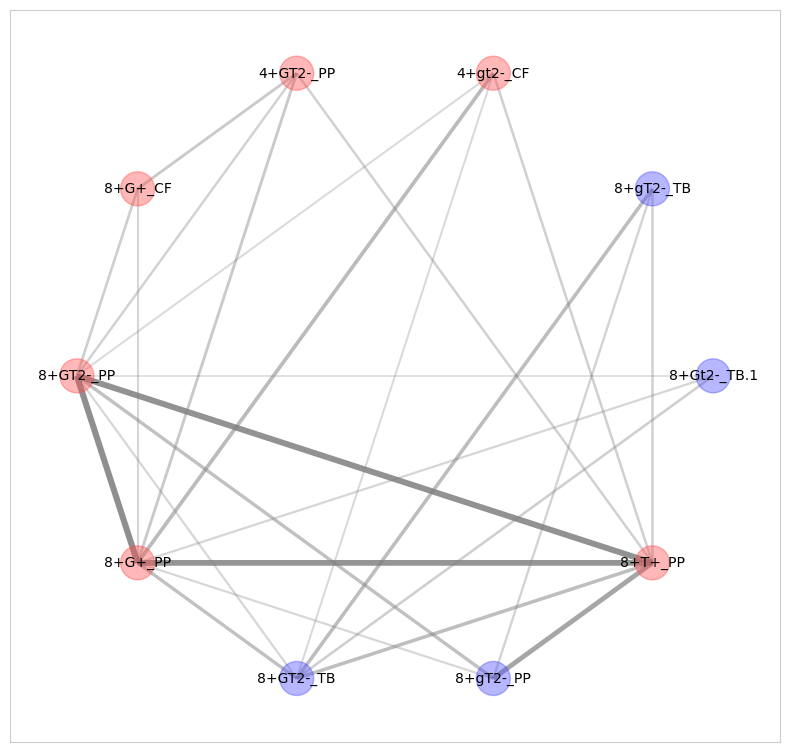

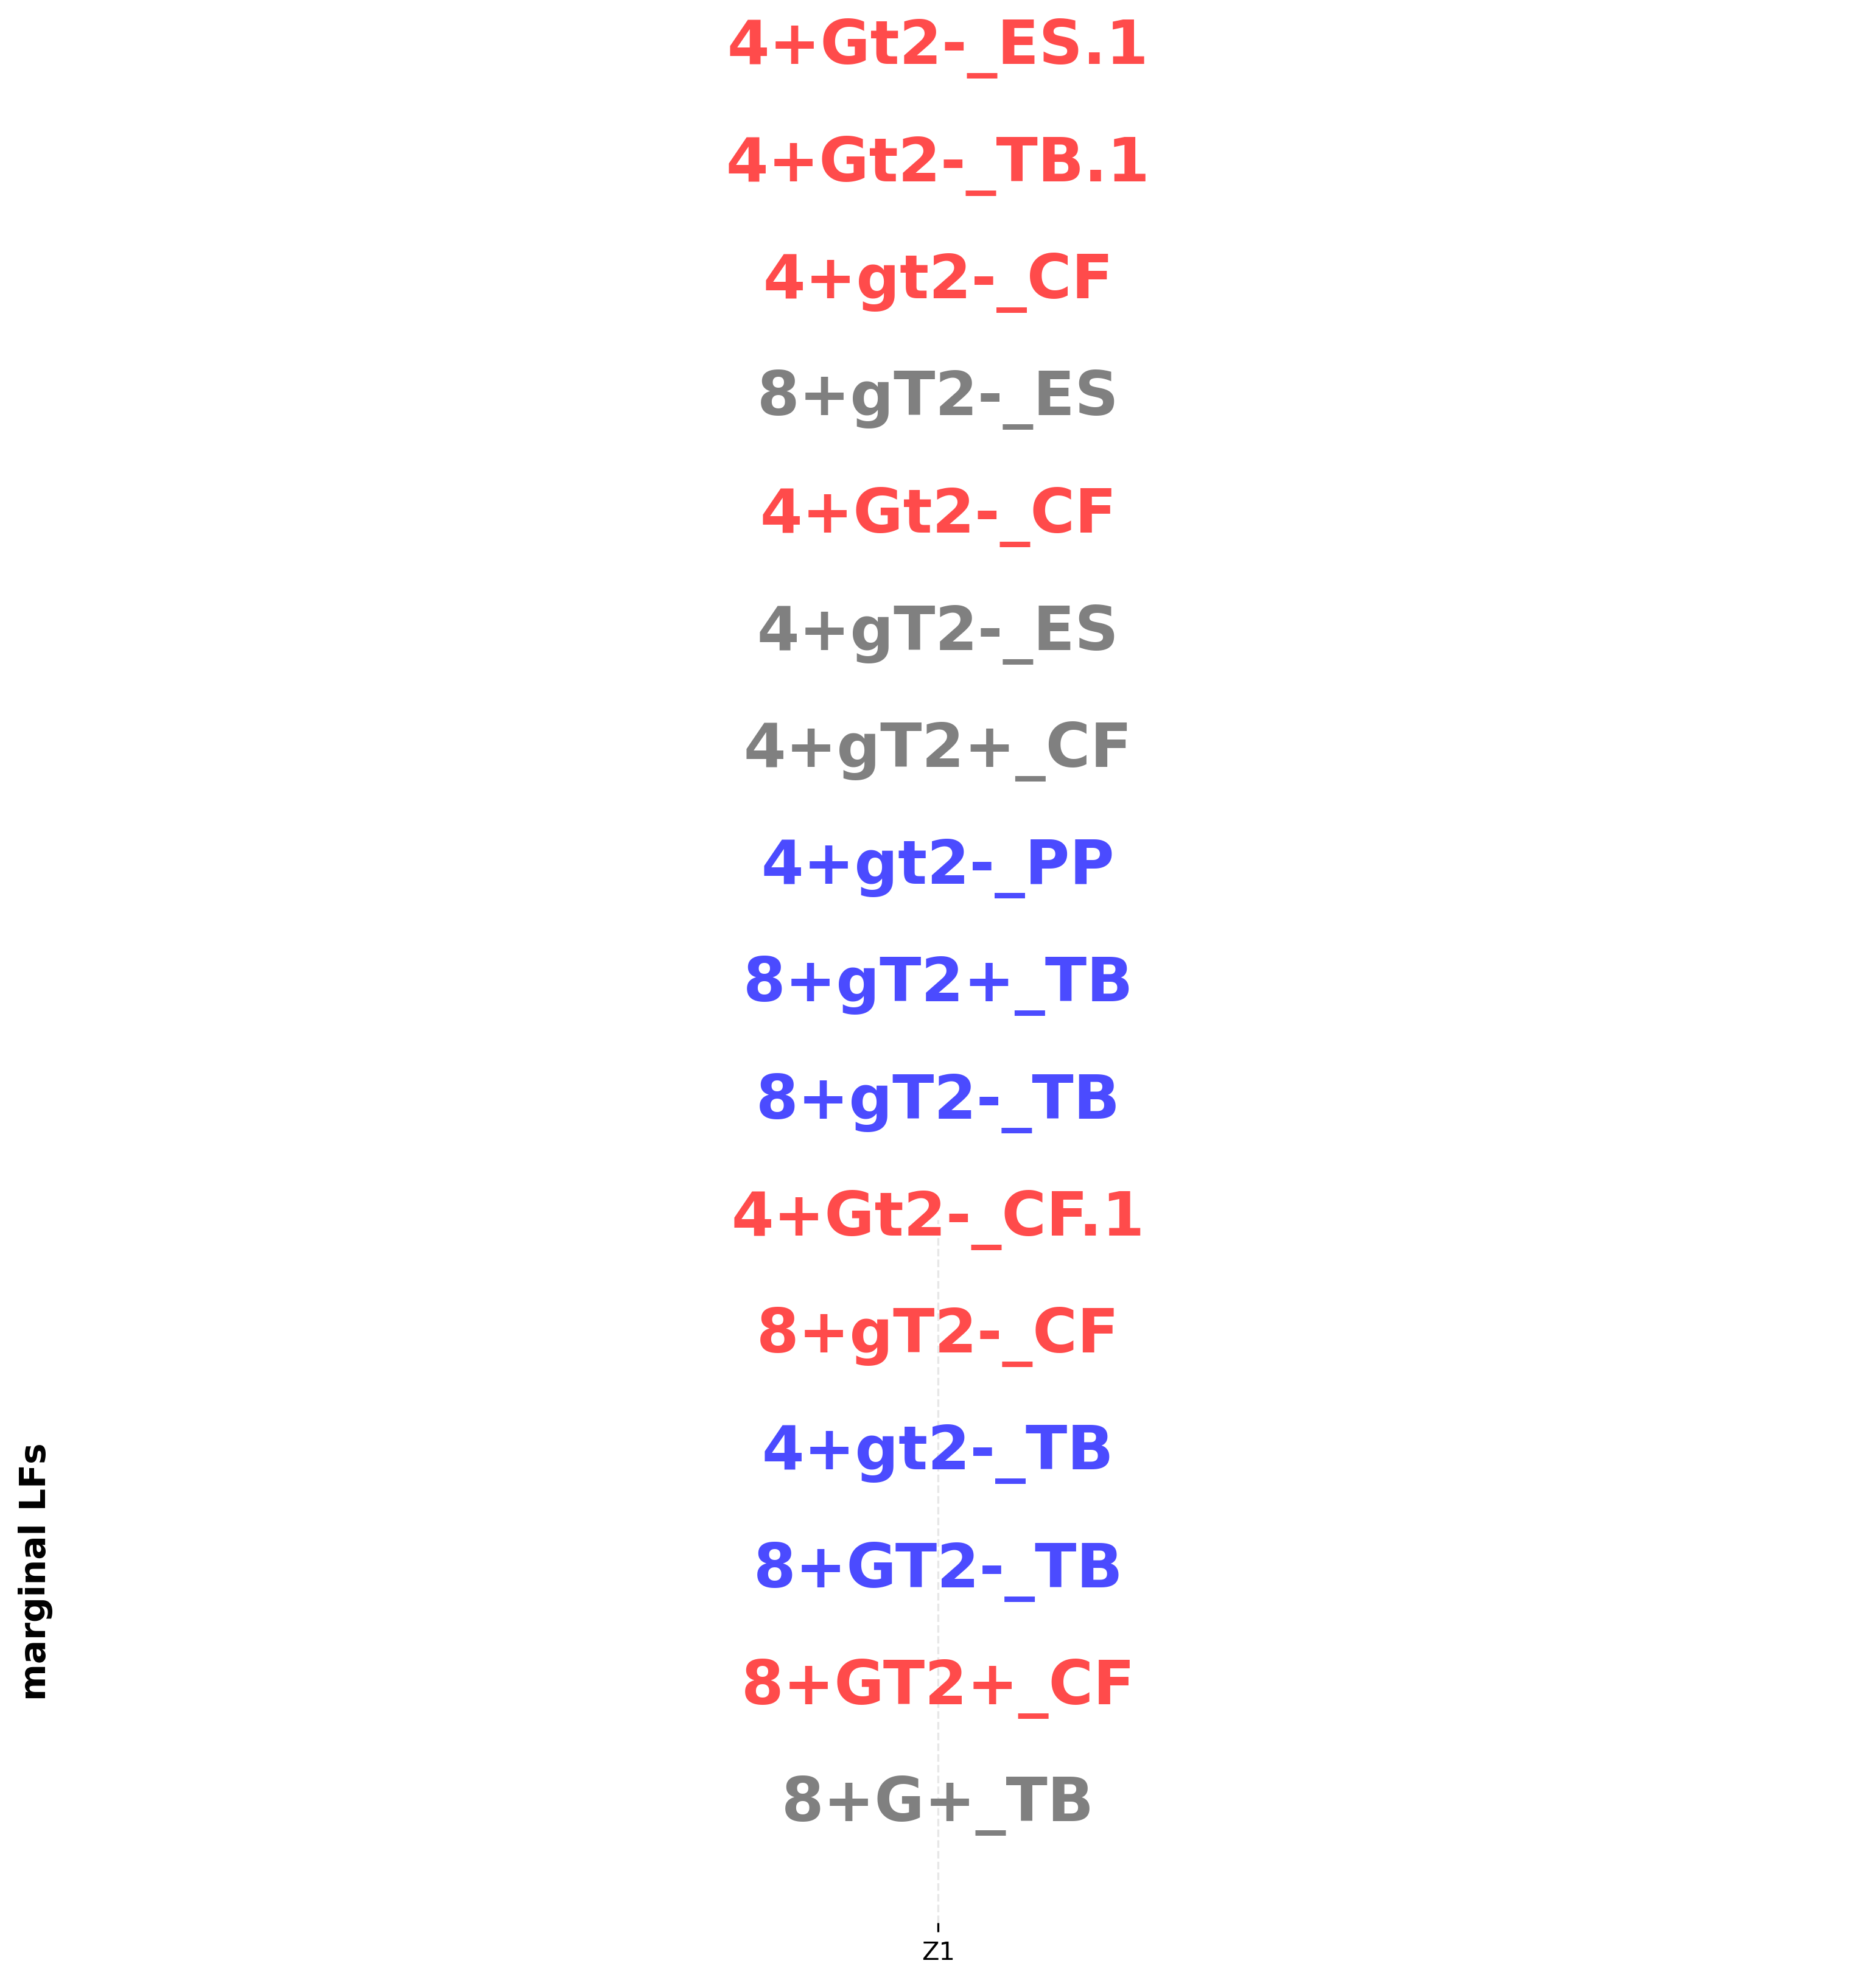

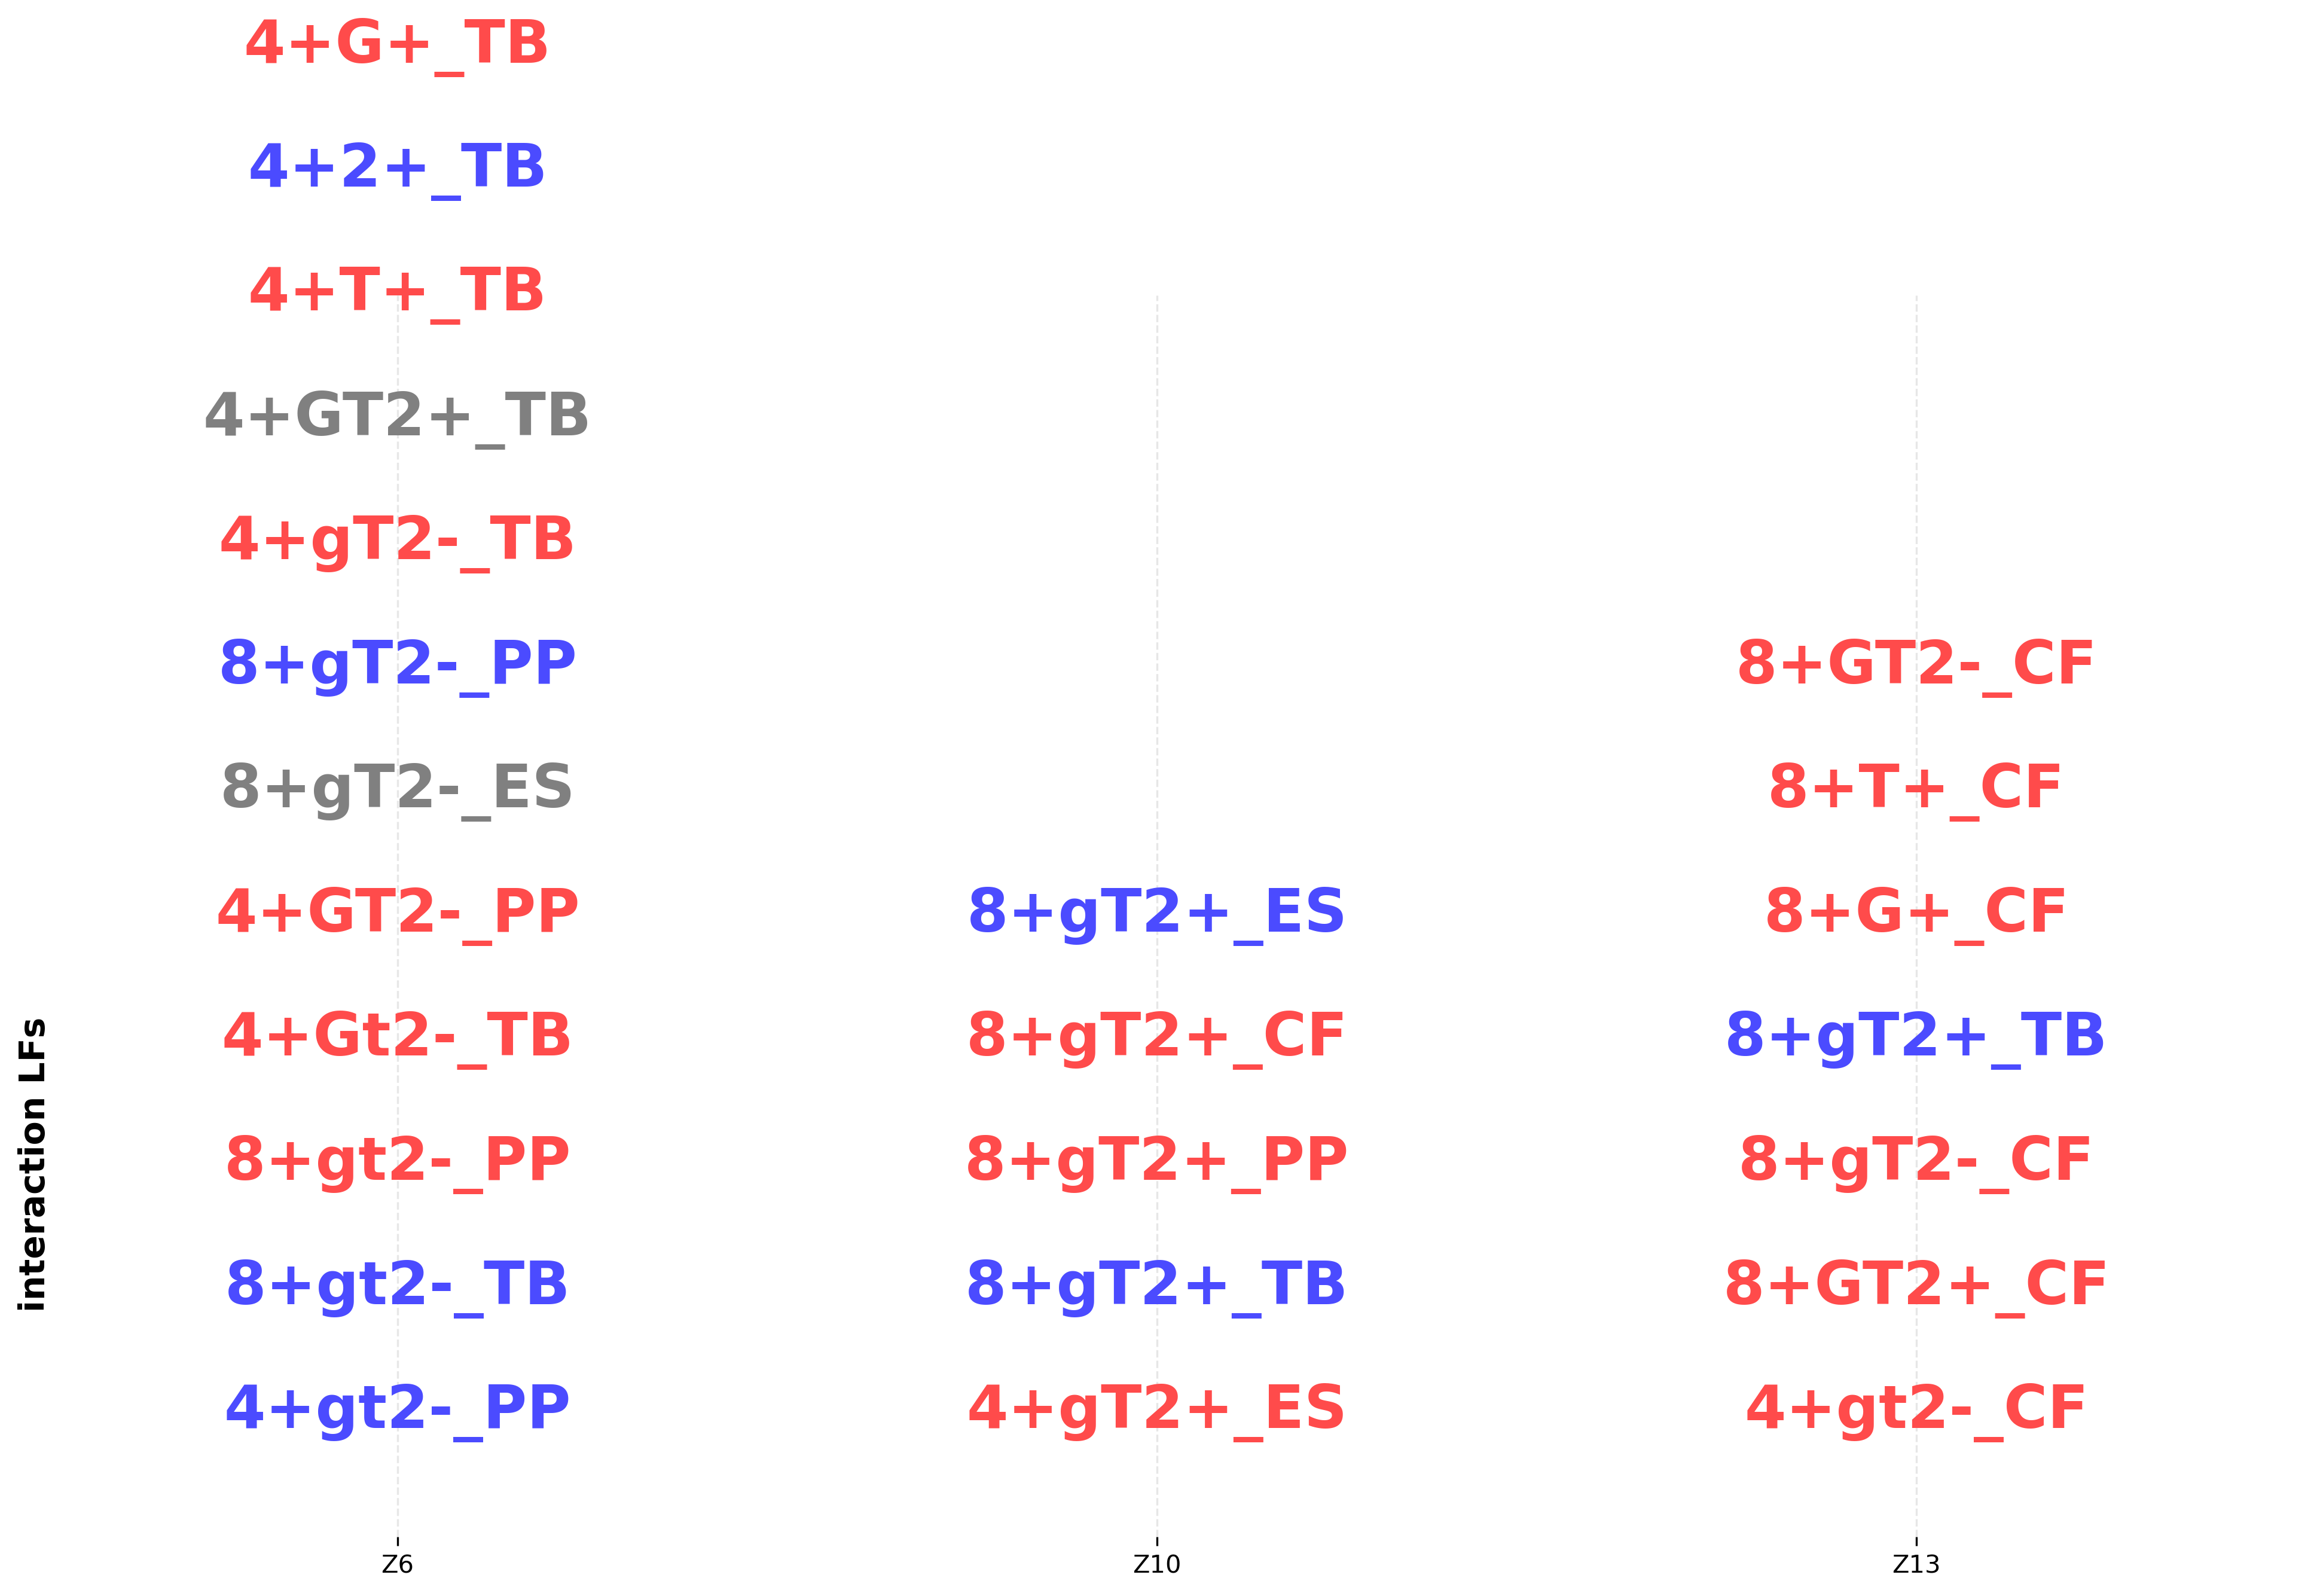

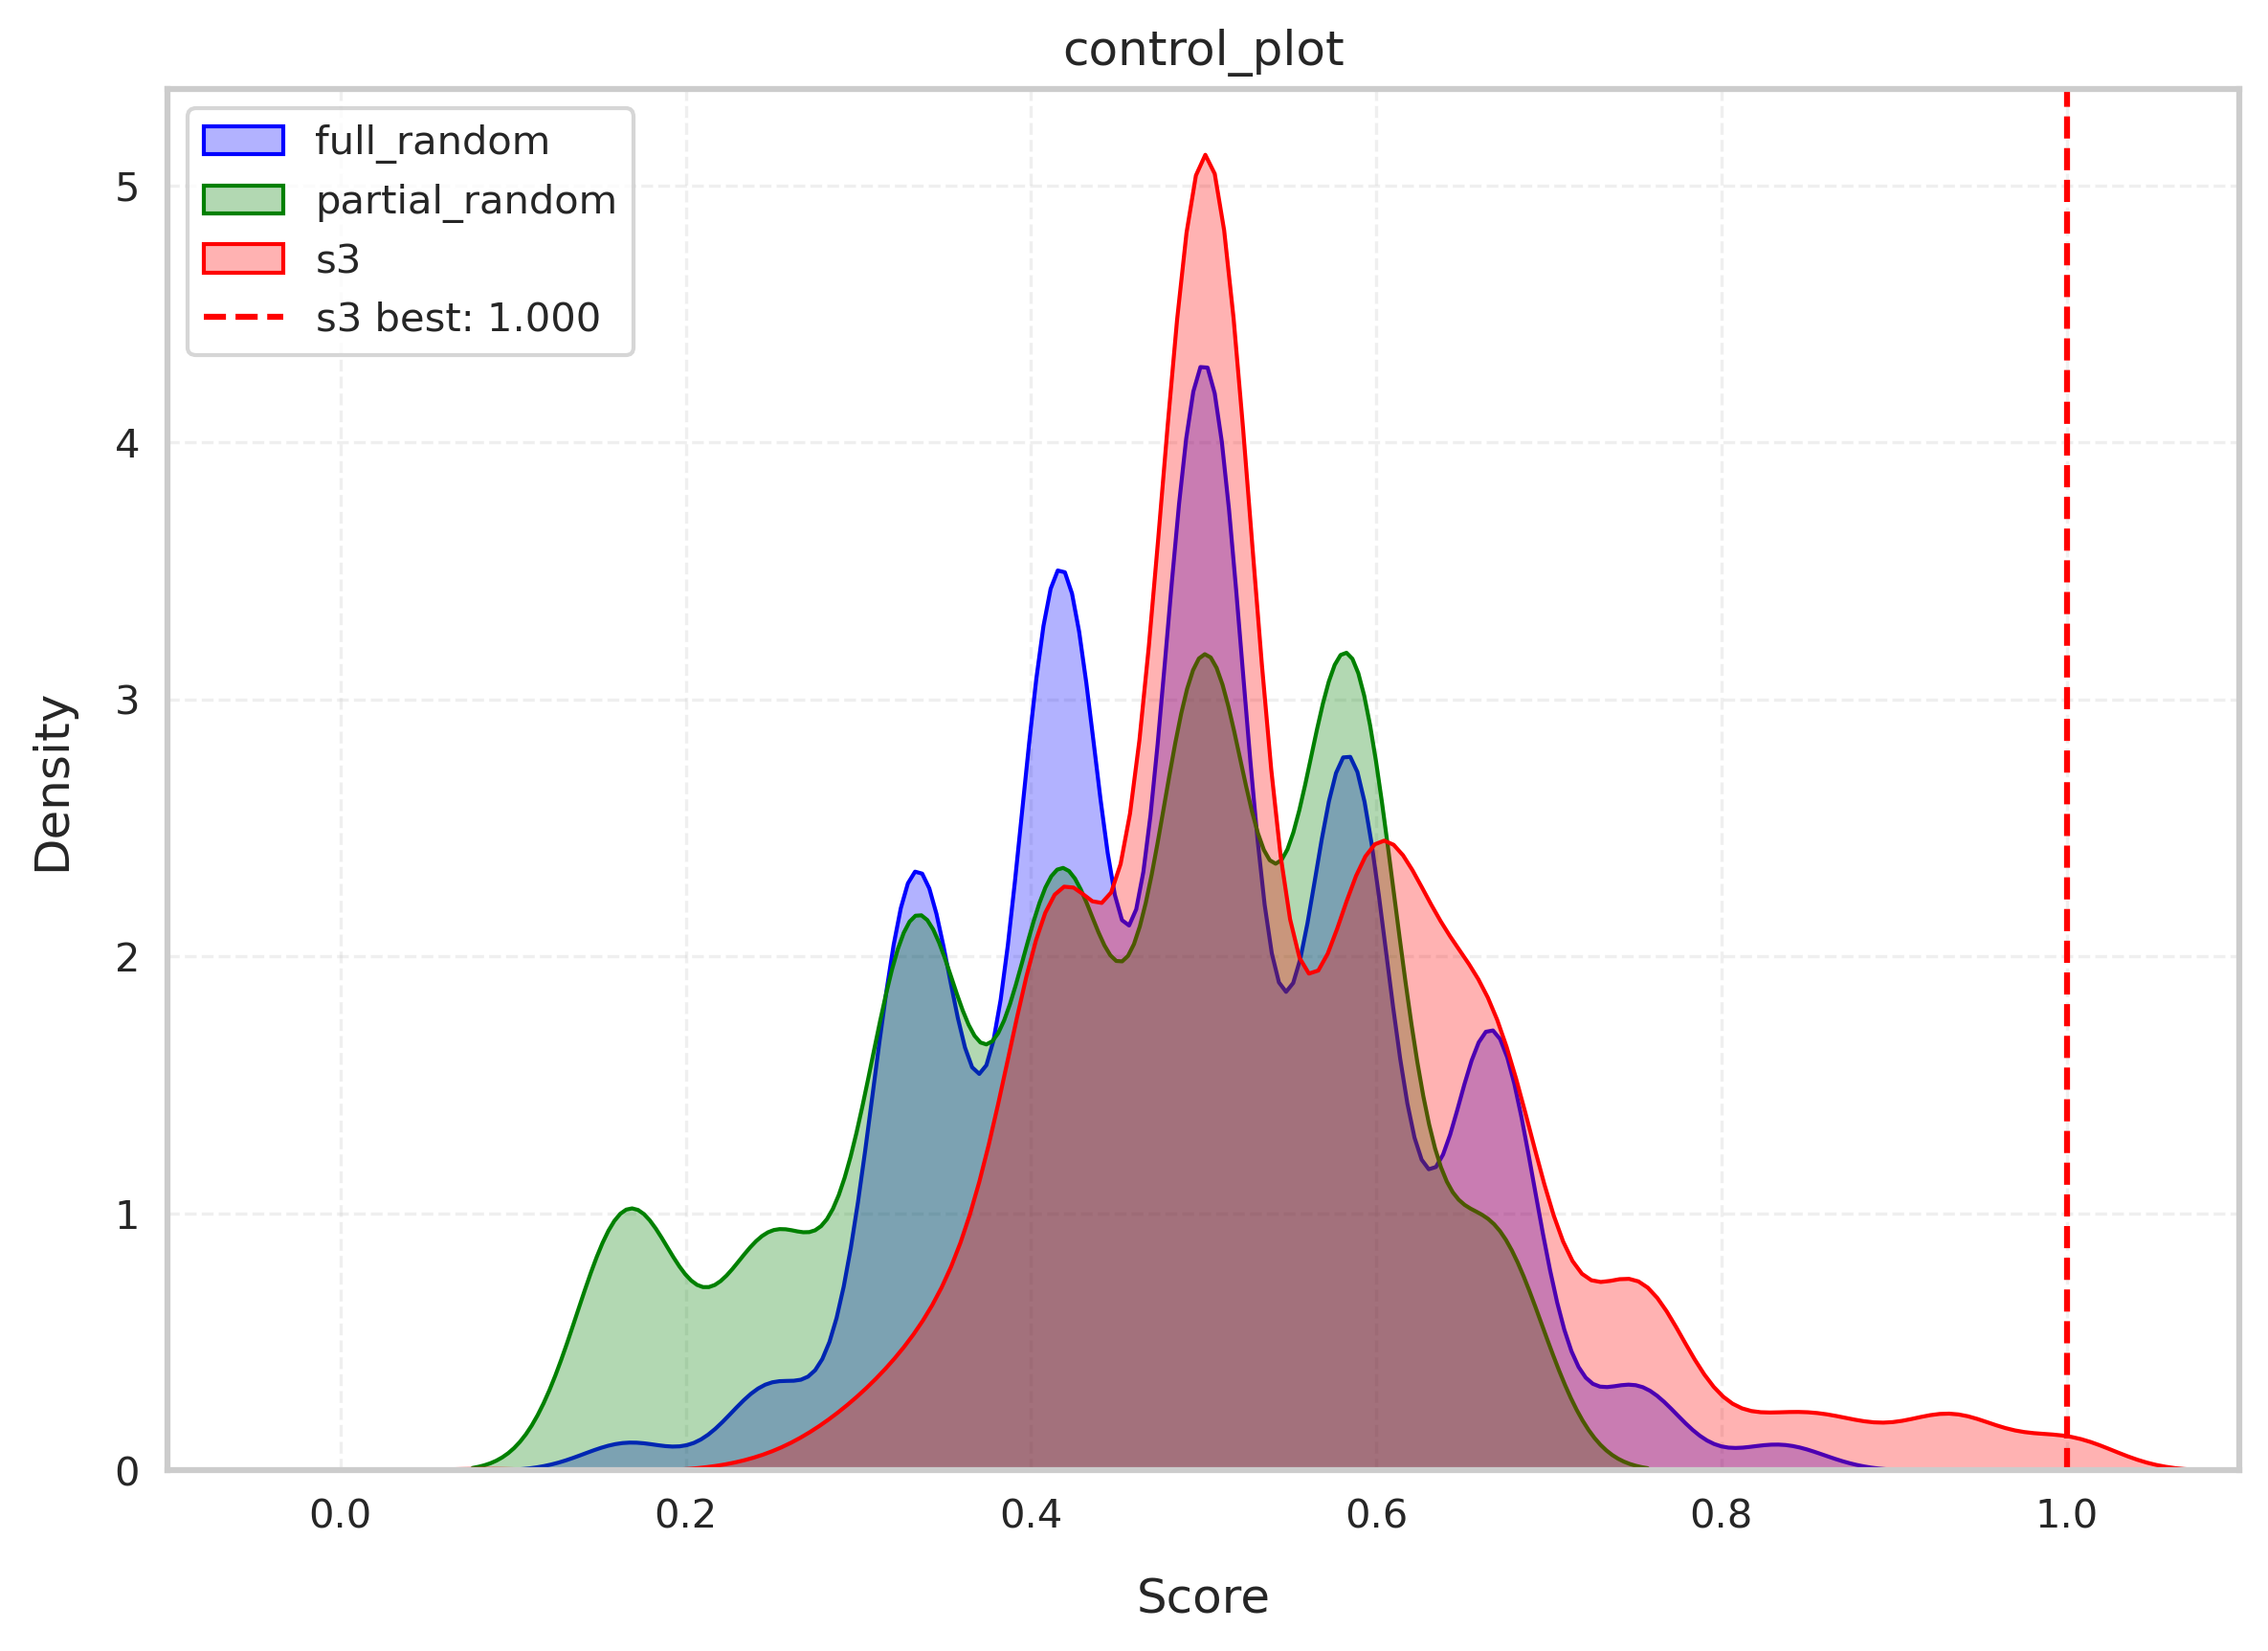

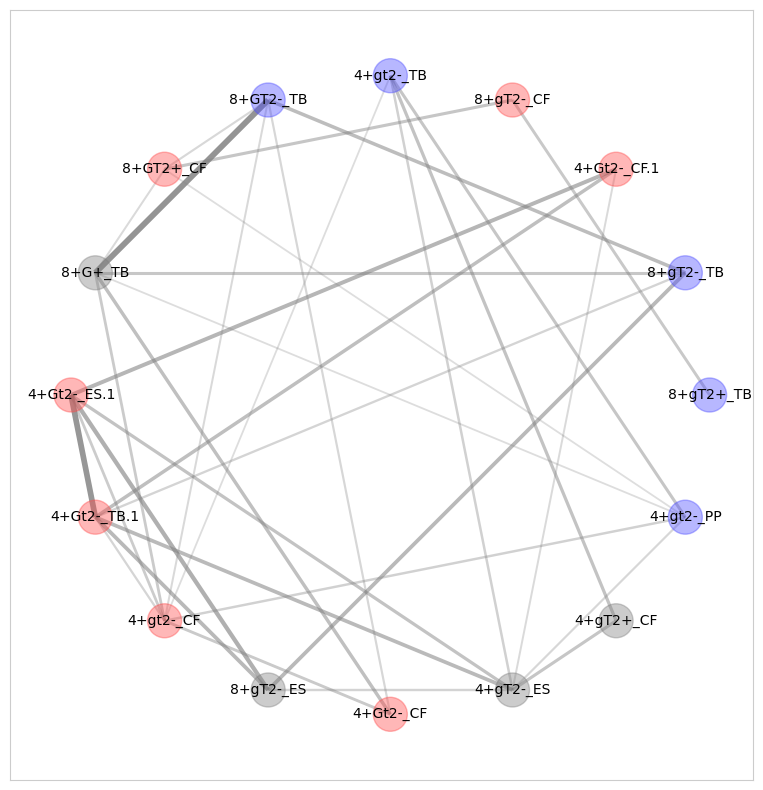

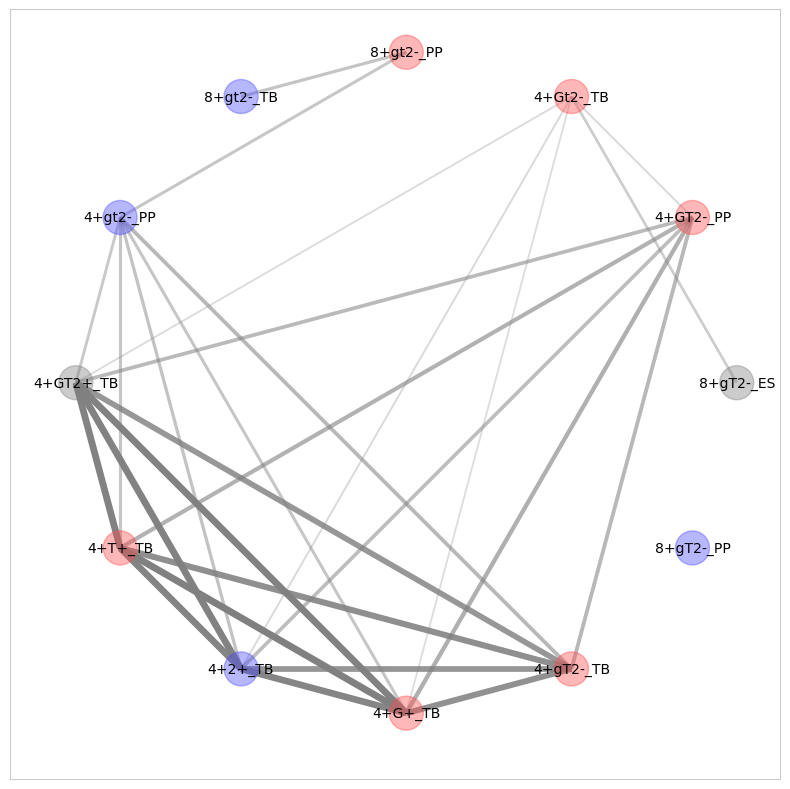

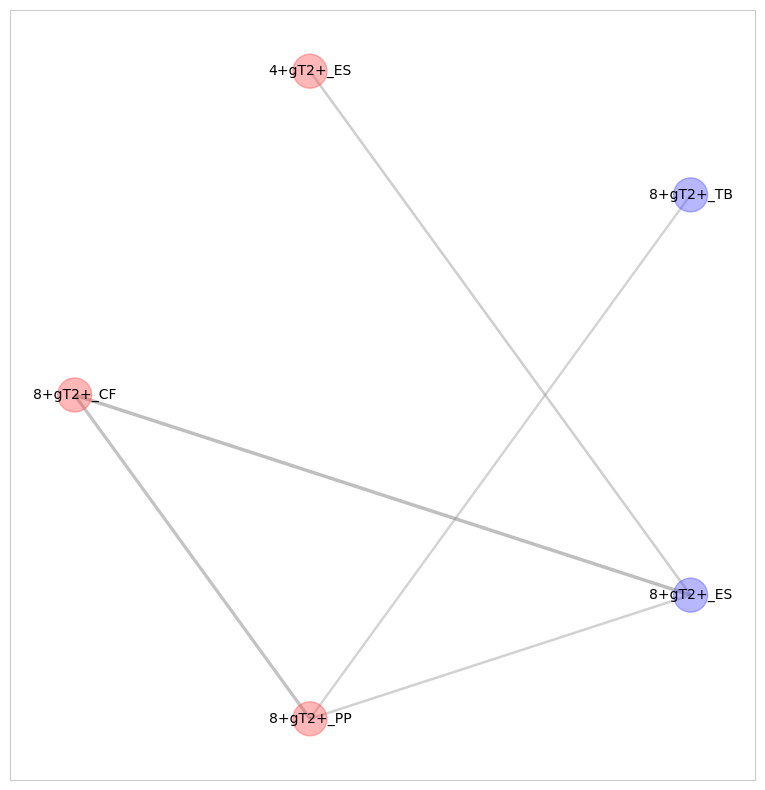

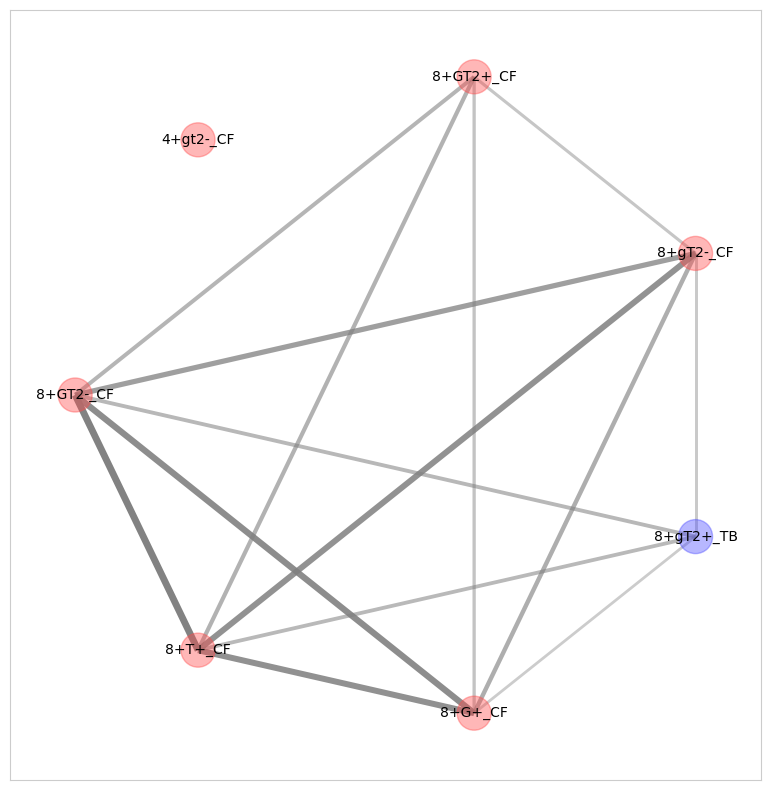

In [4]:
%%time
slider.run_pipeline(verbose=True, n_workers=1)